<h1 style="text-align: center;">
MULTILAYER PERCEPTRON OPTIMIZATION APPLYING<br> PARALLEL COMPUTING ON GPU
</h1>


# I. Introduction

## **1. Background**

Deep learning, a subfield of machine learning, has revolutionized various domains, including image recognition, natural language processing, and robotics. At the core of deep learning are artificial neural networks, interconnected layers of computational units (neurons) that learn complex patterns from data. These networks excel at tasks where traditional programming approaches struggle, such as classifying images based on their content.

Image classification, in particular, has seen significant advancements due to deep learning. Early research often relied on the MNIST dataset, a collection of handwritten digits (0-9). While MNIST served as a valuable benchmark for initial algorithm development, its simplicity has led to concerns about its representativeness of real-world image classification problems. The dataset is relatively small, the images are low-resolution (28x28 pixels), and the task itself is considered too easy for modern deep learning models. This ease of classification can sometimes mask subtle improvements in model architecture or training techniques.

To address these limitations and provide a more challenging and relevant benchmark, researchers at Zalando introduced the Fashion-MNIST dataset. Fashion-MNIST consists of 70,000 grayscale images, divided into a training set of 60,000 images and a test set of 10,000 images, also 28x28 pixels, of fashion articles from 10 different categories:

*   T-shirt/top
*   Trouser
*   Pullover
*   Dress
*   Coat
*   Sandal
*   Shirt
*   Sneaker
*   Bag
*   Ankle boot

**Why Fashion-MNIST?**

Fashion-MNIST offers several advantages over MNIST:

*   **Increased Complexity:** Classifying fashion items is inherently more complex than classifying handwritten digits. The images exhibit more variations in shape, texture, and style, requiring models to learn more sophisticated features.
*   **Relevance to Real-World Applications:** Fashion image classification has direct applications in e-commerce, such as product categorization, search, and recommendation systems. Using Fashion-MNIST provides a more realistic evaluation of models intended for these applications.

By using Fashion-MNIST in this project, we are working with a dataset that is both challenging and relevant to current research in image classification. It allows for a more rigorous evaluation of your CUDA-accelerated neural network implementation and provides a more meaningful comparison to other approaches. This choice reflects a focus on practical applications and the need for more complex benchmarks in the field of deep learning.


## **2. Problem Statement**

Training neural networks on large datasets, such as Fashion MNIST, is computationally intensive, especially when performed sequentially on CPUs. The inefficiencies in handling large-scale data and high-dimensional computations limit the ability to train complex models or process data in real time. This project addresses these challenges by implementing a CUDA-accelerated neural network for efficient training and inference on the Fashion MNIST dataset.

### a. Input
The input data consists of grayscale images of clothing items from the Fashion MNIST dataset.

- **Image Characteristics**:
   - Grayscale images with pixel intensity values ranging from 0 to 255.
   - Resolution: $ 28 \times 28 $ pixels.

- **Preprocessing**:
   - The images are flattened into a 1D array of 784 values, where each value corresponds to a pixel intensity.

- **Batch Input**:
   - To maximize GPU efficiency, a batch of $ N $ images is processed simultaneously.
   - Dimensions of input batch: $ N \times 784 $, where $ N $ is the batch size.

   

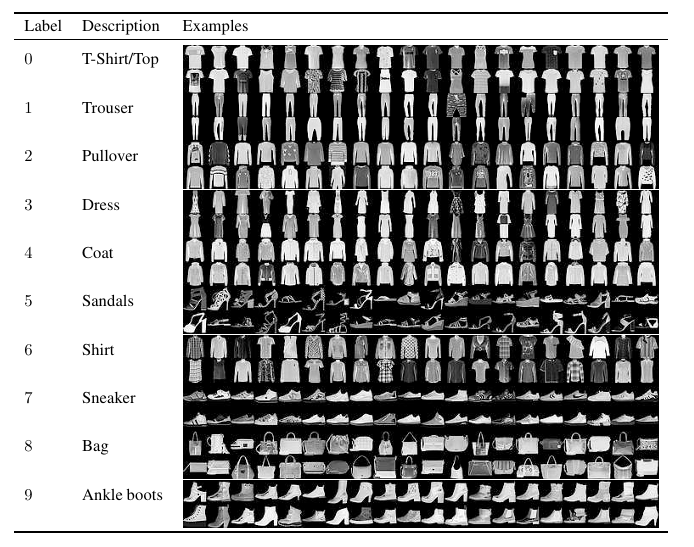

**Figure:**  Class names and example images in Fashion-MNIST dataset.

### **b. Output**

The neural network generates two main outputs:

- **Class Scores**:
   - A vector of 10 values, each representing the predicted probability for one of the 10 clothing categories (e.g., T-shirt, trousers, dress).
   - Example Output Vector:  
 \begin{bmatrix}[ 0.1 & 0.05 & 0.3 & 0.15 & 0.4 & 0 & 0 & 0 & 0 & 0 ]\end{bmatrix}

     In this example, the highest probability is $0.4 $, corresponding to the category "Dress."

- **Predicted Label**:
   - The index of the highest value in the class score vector.
   - Example Predicted Label:
$ \text{Index: } 4 \rightarrow \text{Class: "Coat"} $

### **c. Key Challenges**

- **High Computational Demand**:
   - Operations such as matrix multiplication, activation functions, and backpropagation are computationally expensive, especially for large datasets and deep networks.

- **Data Throughput**:
   - Sequential processing limits the ability to process large batches of data efficiently, resulting in longer training times.

- **Hardware Utilization**:
   - CPU-based implementations underutilize available hardware resources, particularly for tasks amenable to parallel execution.


### **d. Objective**

This project aims to implement and optimize a neural network using CUDA C, addressing the challenges of efficient parallel computation on GPUs. A MLP will be implemented to classify images from the Fashion-MNIST dataset. The project will specifically focus on:


- Implementing two versions of the neural network: one using purely CPU and the other combining CPU and GPU for computation-intensive and independent operations such as matrix addition.
- Applying CUDA optimization techniques to maximize GPU performance in the hybrid version.
- Comparing the execution time and memory usage between the two implementations.
- Documenting the implementation process, optimization steps, and comparative performance results.

## **3. Project Structure**

```markdown
# Project Structure
.cuda_project
├── readme.md :   A detailed description of the project, including goals, setup instructions, and usage guidelines.
├── project_contribution.sheet :   A sheet documenting the contributions of each team member to the project.
├── config.txt :   Contains configuration settings such as dataset paths, training parameters, and environment setup instructions.
├── kernel_colab.cu : CUDA implementation for core computations or neural network training tasks.
├── fashion
    ├── train-images-idx3-ubyte : Training set images.  
    ├── train-labels-idx1-ubyte : Training set labels.
    ├── t10k-images-idx3-ubyte : Test set images.  
    └── t10k-labels-idx1-ubyte : Test set labels.
└── report.ipynb :   A  jupyter notebook presented detailed the process developing the project.
```


- [Project contribution sheet](https://docs.google.com/spreadsheets/d/1jXhaWt9uKCy4tlFd3I2OVujs7iU_SCP3OkSvmtkmf6k/edit?gid=1314710876#gid=1314710876)

- [Github repo: Group 7](https://github.com/NguyenTuan9347/cuda_project)

- [Report.ipynb](https://colab.research.google.com/drive/1sZqh8kQ6TQHcECKI4WL-S_zr-3DXTbib?authuser=1#scrollTo=irUwvBB1iAtP)

- [Video](https://www.youtube.com/watch?v=W9ZNJa1oP8M&feature=youtu.be)


## **4. Group information**

| Student                | ID        | Email                          |
|------------------------|-----------|--------------------------------|
| Nguyen Hoang Anh Tuan  | 21127471  | nhatuan21@clc.fitus.edu.vn     |
| Phan Huy Duc Tai       | 21127687  | phdtai21@clc.fitus.edu.vn      |
| Ho Dinh Duy Luc        | 21127351  | hddluc@clc.fitus.edu.vn        |


# II. Multi-Layer Perceptron (MLP) Mathematical Framework

The input-output pair in a Multi-Layer Perceptron (MLP) can be represented as matrices $(X, Y)$. Assume that $N$ data samples are used during computation. The input $X \in \mathbb{R}^{d^{(0)} \times N}$, and the output $Y \in \mathbb{R}^{d^{(L)} \times N}$, where $d^{(0)} = d$ denotes the dimension of the input data (excluding the bias term).

At each layer, activations are represented as $A^{(l)} \in \mathbb{R}^{d^{(l)} \times N}$, and errors are denoted by $E^{(l)} \in \mathbb{R}^{d^{(l)} \times N}$. The computation proceeds as follows:

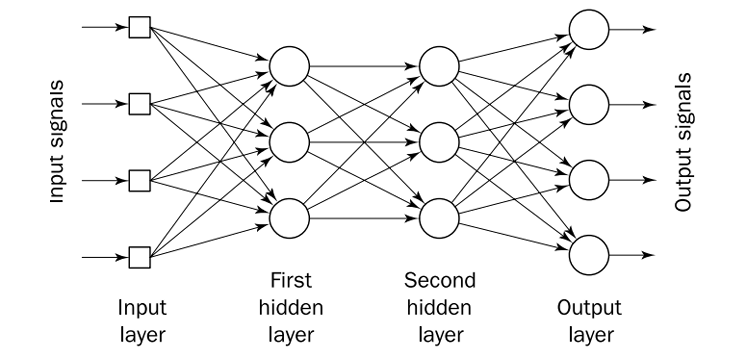

 **Figure:** The structure of MLP( 1 input layer, 2 hidden layers, 1 output layer.)




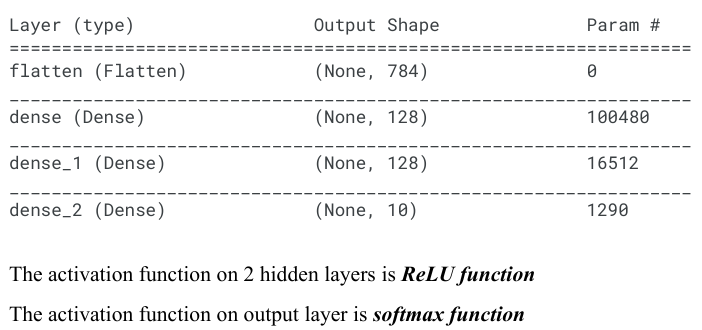


  **Figure:** The deatailed structure of MLP( 1 input layer, 2 hidden layers, 1 output layer.)



### **Feedforward Phase**

During feedforward, the output of the network is computed using the input $X$. Intermediate activations $A^{(l)}$ are stored at each layer. Each column of $A^{(l)}$ corresponds to a column of $X$, representing one input data point.

1. For the first layer:
\begin{align*}
   Z^{(1)} = W^{(1)^T} X + b^{(1)}, \quad A^{(1)} = \max(Z^{(1)}, 0)
\end{align*}

2. For the second layer:
\begin{align*}
   Z^{(2)} = W^{(2)^T} A^{(1)} + b^{(2)}, \quad A^{(2)} = \max(Z^{(2)}, 0)
\end{align*}

3. For the output layer:
\begin{align*}
   Z^{(3)} = W^{(3)^T} A^{(2)} + b^{(3)}, \quad A^{(3)} = \text{softmax}(Z^{(3)}), \quad \hat{Y} = A^{(3)}
\end{align*}


### **Loss Function**

The loss function measures the difference between the predicted and actual outputs:
\begin{align*}
J(W, b; X, Y) = -\frac{1}{N} \sum_{i=1}^{N} \sum_{j=1}^{C} y_{ji} \log(\hat{y}_{ji})
\end{align*}

### **Backward Phase**

1. For the output layer:
\begin{align*}
   E^{(3)} = \frac{\partial J}{\partial Z^{(3)}} = \frac{1}{N} (\hat{Y} - Y)
\end{align*}
   Gradients for weights and biases:
\begin{align*}
   \frac{\partial J}{\partial W^{(3)}} = A^{(2)} E^{(3)^T}, \quad \frac{\partial J}{\partial b^{(3)}} = \sum_{n=1}^{N} e^{(3)}_n
\end{align*}

2. For the hidden layers $(l = L-1, \dots, 1)$:
\begin{align*}
   E^{(l)} = \left(W^{(l+1)} E^{(l+1)}\right) \odot f'(Z^{(l)})
\end{align*}
   Gradients for weights and biases:
\begin{align*}
   \frac{\partial J}{\partial W^{(l)}} = A^{(l-1)} E^{(l)^T}, \quad \frac{\partial J}{\partial b^{(l)}} = \sum_{n=1}^{N} e^{(l)}_n
\end{align*}

   For the first layer:
\begin{align*}
   \frac{\partial J}{\partial W^{(1)}} = X E^{(1)^T}, \quad \frac{\partial J}{\partial b^{(1)}} = \sum_{n=1}^{N} e^{(1)}_n
\end{align*}
### **Weight and Bias Update**

Using gradient descent, weights and biases are updated as:

\begin{align*}
W_l^{t+1} = W_l^t - \text{lr} \cdot \frac{\partial J}{\partial W^{(l)}}, \quad b_l^{t+1} = b_l^t - \text{lr} \cdot \frac{\partial J}{\partial b^{(l)}}
\end{align*}

where $\text{lr}$ is the learning rate.


# III. **Analyze**

### **1. Data Processing**

Loading a batch of data from memory into the processing pipeline is a preliminary but essential step, especially when dealing with large datasets. To avoid memory overload (OOM) on the GPU, mini-batch processing is applied.

1. Define the function `readImages` with parameters:
   - `path`: the path to the images file
   - `num_images`: pointer to the number of images in the dataset
   - `image_size`: pointer to the size of each image (in pixels)
   - `batchSize`: the size of the mini-batch to be loaded

2. CPU implementation:
   - Open the file in binary read mode.
   - Read the magic number and reverse its byte order.
   - Read the total number of images and reverse its byte order.
   - Read the number of rows and columns in the images, then verify they are 28x28. If not, print an error message and return `nullptr`.
   - Calculate the image size (`image_size = rows * columns`).
   - Compute the number of mini-batches required to load all the images.
   - For each mini-batch:
     - Allocate memory for the batch and load each image.
     - Convert pixel values to floats and normalize them by dividing by 255.

**Optimization strategies:**
- **Mini-Batch Processing**: Sequentially load smaller chunks of data, known as mini-batches, to prevent out-of-memory issues on the GPU. This also helps with reducing training time as gradients are updated more frequently.


### **2. Matrix Multiplication**

1. Define the function `matrixMultiplication` with parameters:
   - `A`: first input matrix
   - `B`: second input matrix
   - `C`: output matrix
   - `m`: number of rows in matrix `A`
   - `n`: number of columns in matrix `A` and rows in matrix `B`
   - `k`: number of columns in matrix `B`
   - `useDevice`: boolean flag to indicate whether to use the device (default is `false`)
   - `blockSize`: CUDA block size (default is `dim3(1)`)

2. CPU implementation:
   - Initialize a loop variable `i` from 0 to `m-1`.
   - For each `i`, initialize a loop variable `j` from 0 to `k-1`.
   - For each `j`, initialize a variable `sum` to 0.0.
   - For each `i` and `j`, initialize a loop variable `t` from 0 to `n-1`.
   - For each `t`, update `sum` by adding the product of `A[i * n + t]` and `B[t * k + j]`.
   - After the inner loop, assign `sum` to `C[i * k + j]`.

**Optimization strategies:**

- **Block-based Parallelism**: Divide the matrices into blocks (sub-matrices), and assign each block to a different GPU thread block. Each thread within the block performs the multiplication for a specific element in the sub-matrix. This technique can increase memory access efficiency and reduce latency.
- **Shared Memory Optimization**: Use the GPU’s shared memory to store sub-matrices that are actively being used, reducing the number of global memory accesses and improving performance.


### **3. Element-wise Operations:**

#### **elementWiseBinary Function**

1. Define the function `elementWiseBinary` with parameters:
   - `a`: first input array
   - `b`: second input array
   - `c`: output array
   - `rowSize`: number of rows
   - `colSize`: number of columns
   - `binary`: pointer to a binary function
   - `useDevice`: boolean flag to indicate whether to use the device (default is `false`)

2. CPU implementation:
   - Loop through each element in the arrays using two nested loops:
     - Outer loop: iterate over rows (`i` from 0 to `rowSize - 1`)
     - Inner loop: iterate over columns (`j` from 0 to `colSize - 1`)
   - Calculate the index `idx` as `i * colSize + j`
   - Apply the binary function to the elements `a[idx]` and `b[idx]` and store the result in `c[idx]`

**Optimization strategies:**
- For each output index, there would be a thread that calls the given function pointer with `a[idx]` and `b[idx]` as the corresponding input arguments.

### **4. Update Weight:**

1. Define the function `updateWeights` with parameters:
   - `hiddenWeights`: the weight matrix to be updated
   - `grads`: the gradient matrix
   - `featureSize`: number of rows in the weight matrix
   - `outputSize`: number of columns in the weight matrix
   - `LR`: learning rate
   - `isUpdateWeight`: flag to indicate whether the weight matrix should be updated (set to `true` for weight updates, `false` for bias updates)
   - `useDevice`: boolean flag to indicate whether to use the device (default is `false`)
   - `blockSize`: CUDA block size (default is `dim3(1)`)

2. **CPU Implementation**:
   - Loop through each layer and handle updates for both weights and biases:
     - For each layer, determine the current and previous sizes:
       - `currSize`: For the last layer, set it to `outputSize`, otherwise to `HIDDEN_SIZE`
       - `prevSize`: For the first layer, set it to `featureSize`, otherwise to `HIDDEN_SIZE`
     - If `isUpdateWeight` is `false` (to update biases), set `prevSize = currSize` and `currSize = 1` to perform bias update.
     - Loop through each element of the weight and gradient matrices using two nested loops:
       - Outer loop: iterate over rows (`i` from 0 to `prevSize - 1`)
       - Inner loop: iterate over columns (`j` from 0 to `currSize - 1`)
     - Calculate the index `idx = i * currSize + j`
     - Update the weight or bias: `hiddenWeights[layer][idx] -= LR * grads[layer][idx]`

**Optimization strategies:**
- **GPU Parallelism**: Use CUDA streams to perform updates to each layer in parallel, allowing for efficient execution and reducing overall training time.
- **Layer-Specific Processing**: Each layer’s update is handled independently, allowing for better parallel resource utilization. This optimizes GPU performance by processing weight and gradient updates for each layer concurrently.

### **5. Apply ReLU:**

1. Define the function `applyRelu` with parameters:
   - `a`: input array
   - `c`: output array after ReLU is applied
   - `rowSize`: number of rows in the array
   - `colSize`: number of columns in the array
   - `useDevice`: boolean flag to indicate whether to use the device (default is `false`)
   - `blockSize`: CUDA block size (default is `dim3(1)`)

2. CPU implementation:
   - Loop through each element in the input array:
     - For each element `a[i]`, apply the ReLU operation: `c[i] = max(0, a[i])`

**Optimization strategies:**
- The ReLU operation is element-wise, so each thread applies the ReLU function to the corresponding input element. This allows parallel processing on GPU for better efficiency.

### **6. Compute Softmax:**

1. Define the function `computeSoftmax` with parameters:
   - `input`: the input array
   - `output`: the array to store the softmax results
   - `size`: the size of the input array
   - `useDevice`: boolean flag to indicate whether to use the device (default is `false`)
   - `blockSize`: CUDA block size (default is `dim3(1)`)

2. CPU implementation:
   - Compute the softmax for each element in the input array:
     - First, calculate the exponentials of all elements in the array.
     - Then, normalize the values by dividing each exponential by the sum of all exponentials to get the softmax output.

**Optimization strategies:**
- The Softmax operation is batch-wise, and each thread processes a given batch output array. Each thread calculates its corresponding softmax value, which can be parallelized for better performance, especially on GPU.

### **7. Compute Bias Gradient:**

1. Define the function `computeBiasGradient` with parameters:
   - `gradToLoss`: gradient from loss function
   - `gradBias`: gradient for the bias
   - `batchSize`: number of samples in the batch
   - `outputSize`: number of classes
   - `useDevice`: boolean flag to indicate whether to use the device (default is `false`)
   - `blockSize`: CUDA block size (default is `dim3(1)`)

2. CPU implementation:
   - For each batch, compute the bias gradient by averaging the gradient values across all elements:
     - The gradient for each bias is the average of all corresponding gradients in the batch.

**Optimization strategies:**
- Matrix addition column-wise on GPU is more efficient than using a 2D loop, particularly for large datasets. This allows for parallel processing of bias gradients and faster computation, reducing CPU bottlenecks.

### **8. Matrix Transpose**

1. Define the function `transpose` with parameters:
   - `matrix`: the input matrix to be transposed
   - `rowSize`: the number of rows in the input matrix
   - `colSize`: the number of columns in the input matrix
   - `useDevice`: a boolean flag to indicate whether to use the GPU (default is `false`)
   - `blockSize`: the CUDA block size (default is `dim3(1)`)

2. **CPU Implementation:**
   - Allocate memory for the output matrix, which will have dimensions `colSize x rowSize`.
   - Loop through each element in the input matrix using two nested loops:
     - Outer loop: iterate over rows (`i` from 0 to `rowSize - 1`)
     - Inner loop: iterate over columns (`j` from 0 to `colSize - 1`)
   - Calculate the index for the input matrix (`i * colSize + j`) and the corresponding index for the transposed matrix (`j * rowSize + i`).
   - Copy the element from the input matrix to the output matrix at the transposed index.

**Optimization strategies:**
- For the GPU implementation, the matrix is divided into blocks, and each thread computes one element of the transposed matrix.
- The use of shared memory helps optimize memory access patterns, minimizing global memory reads and writes.
- Parallelization across blocks and threads allows the transposition to be done in parallel, speeding up the operation significantly when working with large matrices.

### Why These Steps Need to Be Optimized ?

 - **Parallel-Friendliness:** Sequential processing creates performance bottlenecks, especially when dealing with large image datasets and higher resolutions. This significantly restricts the speed and efficiency of the training and testing process. Optimizing the code to leverage parallel processing (e.g., using GPUs) will significantly improve performance and enable faster execution of computationally-intensive operations.

- **Reducing Training Time:** Slow training increases development time and delays model testing and iteration. Optimization is essential to speed up the training process, enabling faster model development, quicker experimentation with different architectures and hyperparameters, and overall better resource utilization, particularly by utilizing GPUs instead of CPUs for heavy computations.






# IV. Design



## **1. Matrix Multiplication**

### **a. Design**

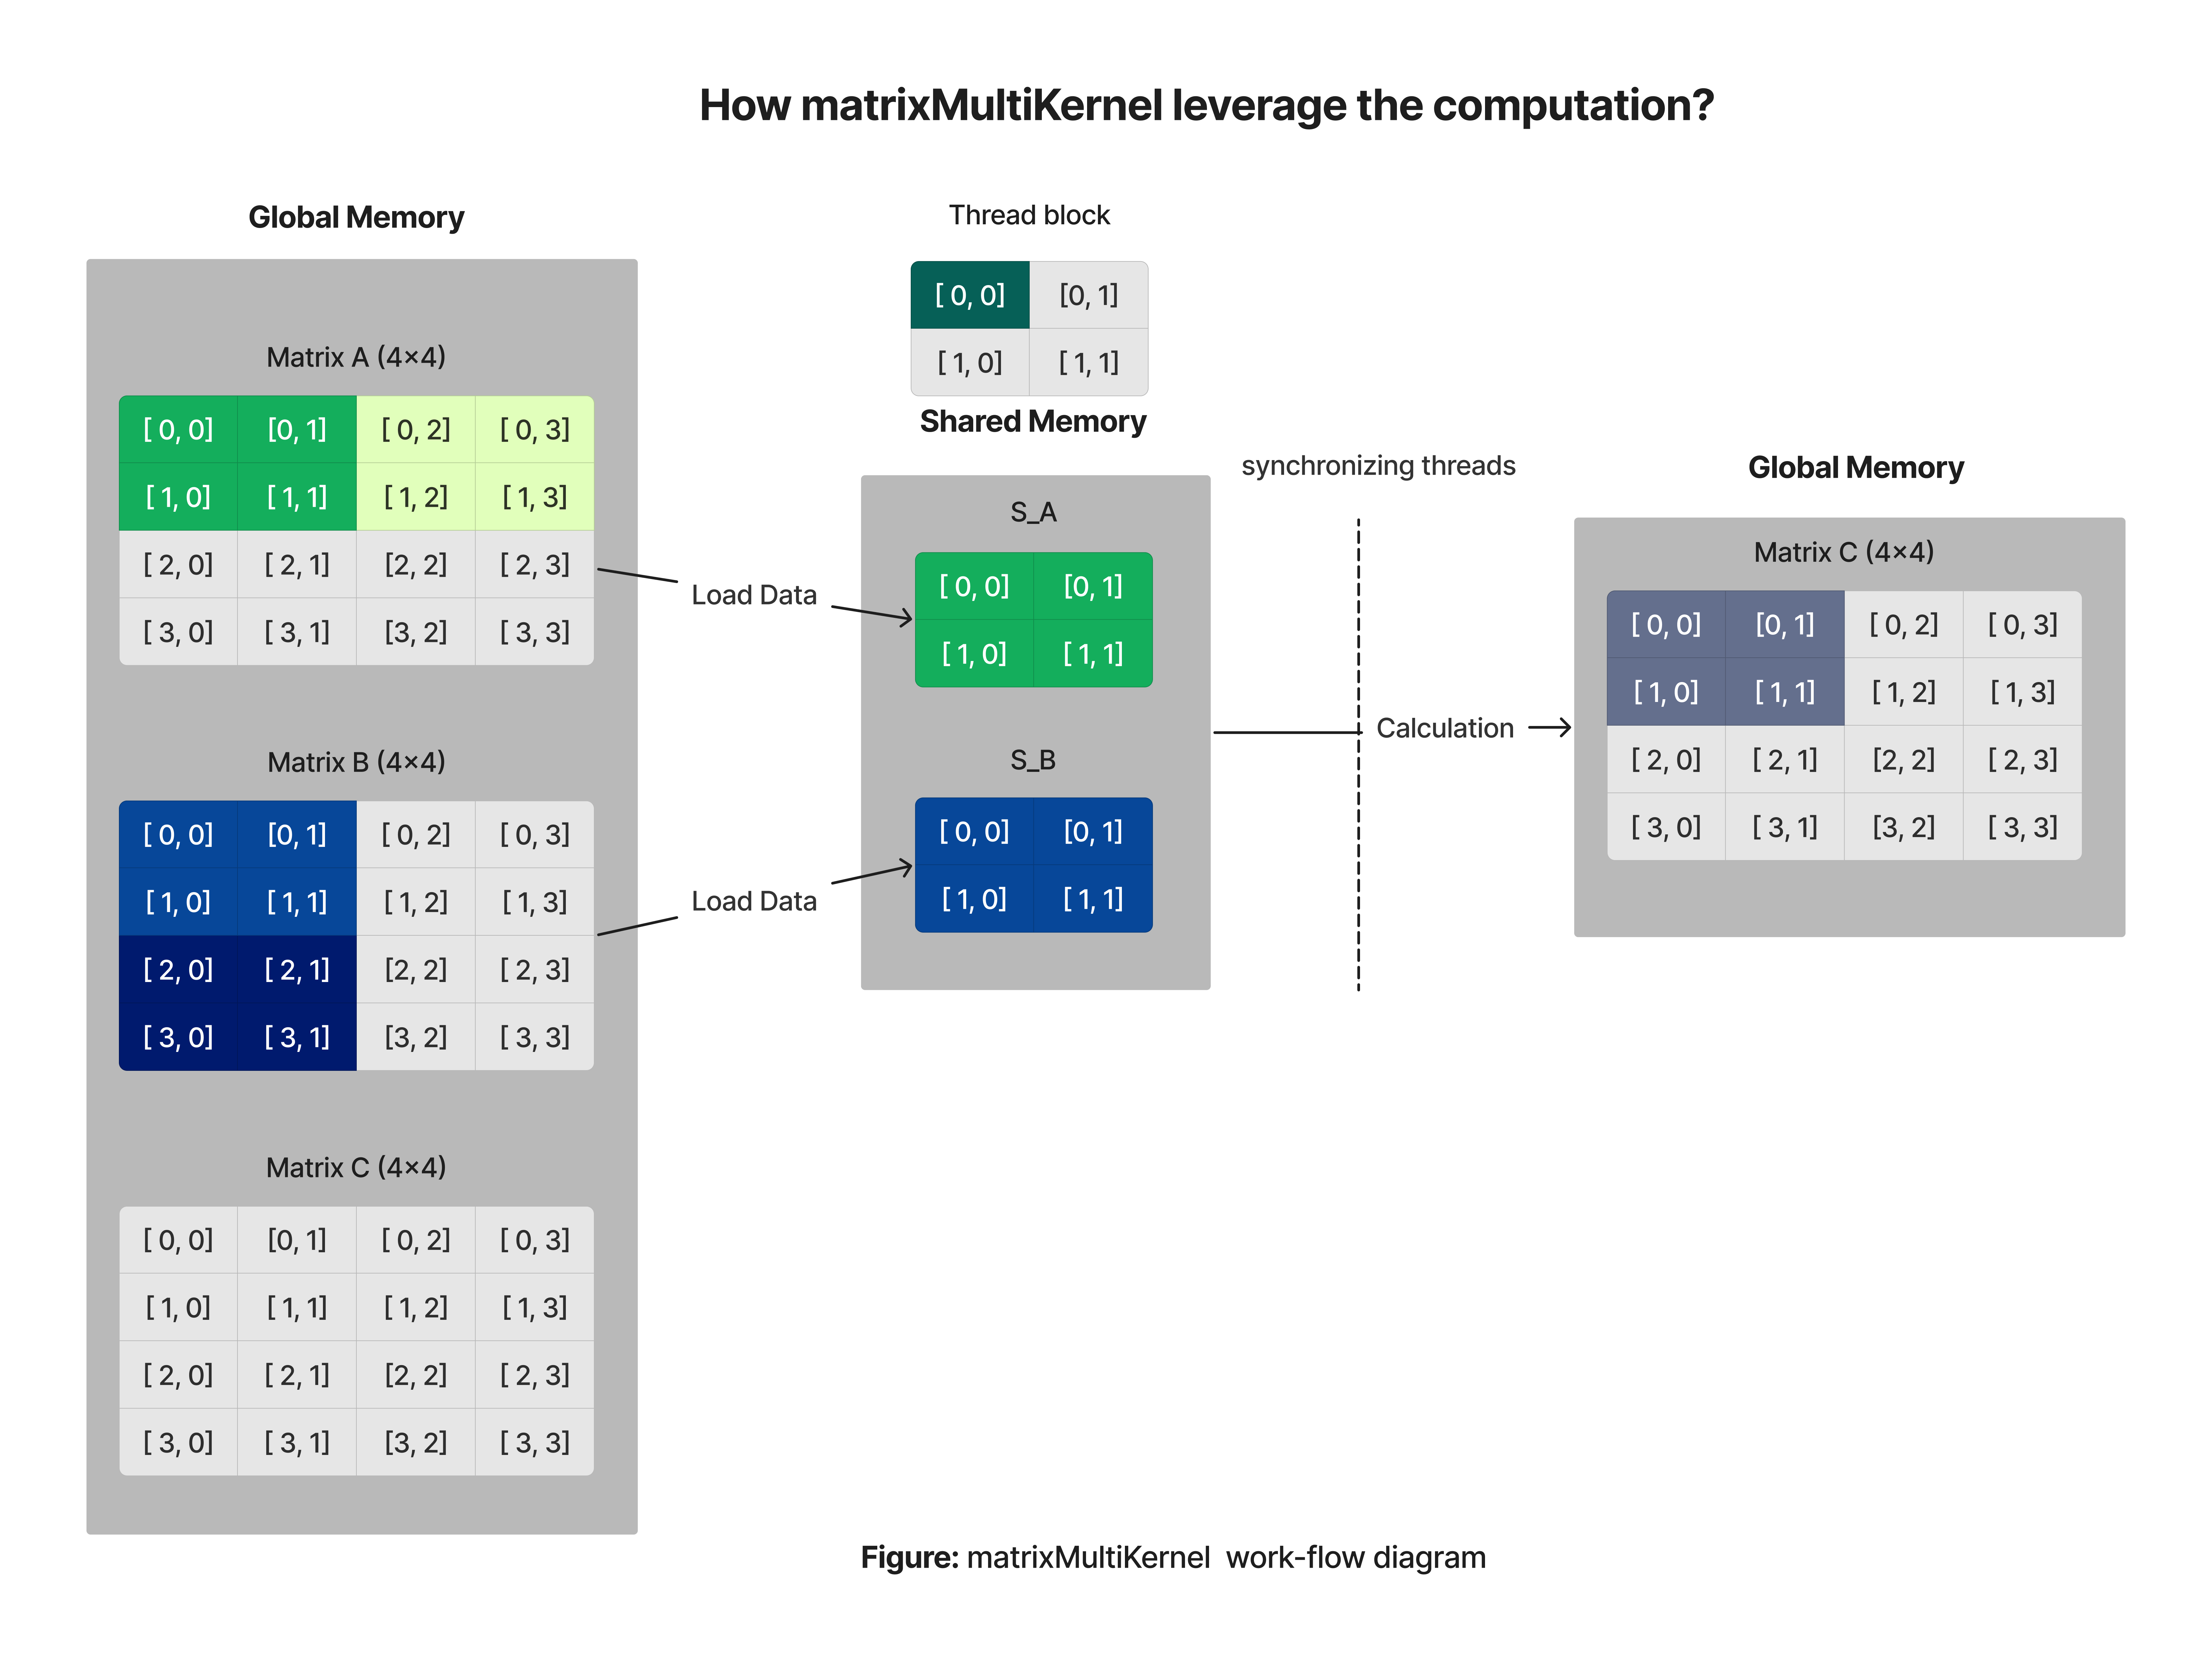

### **b. Implementation**

```markdown
### matrixMultiKernel Function
1. Define the kernel function `matrixMultiKernel` with parameters:
   - `A`: input matrix A
   - `B`: input matrix B
   - `C`: output matrix C
   - `m`: number of rows in matrix A and C
   - `n`: number of columns in matrix A and rows in matrix B
   - `k`: number of columns in matrix B and C

2. Declare shared memory arrays `s_A` and `s_B` with size `TILE_K x TILE_K`.

3. Calculate the row index `row` and column index `col` based on block and thread indices.

4. Initialize a variable `s` to 0.0.

5. Loop over batches of tiles:
   - Calculate the column index `A_col` for matrix A and the row index `B_row` for matrix B.
   - Load elements from matrix A and B into shared memory `s_A` and `s_B` respectively.
   - Synchronize threads to ensure all data is loaded into shared memory.

6. Loop over elements in the tile:
   - Update `s` by adding the product of corresponding elements from `s_A` and `s_B`.

7. Synchronize threads to ensure all computations are complete.

8. If the current thread corresponds to a valid element in matrix C, store the result `s` in `C`.

9. End of kernel function.
```
### Code analysis

- **Shared Memory Usage:**
The kernel utilizes shared memory $s_A$ and $s_B$ to store submatrices of $A$ and $B$. This reduces the number of global memory accesses, which are slower compared to shared memory accesses. Each thread block loads a tile of data into shared memory before performing computations.

- **Thread Indexing:**
Each thread computes its unique row and column indices using the built-in variables $blockIdx$,$blockDim$, and $threadIdx$. This indexing allows each thread to identify its corresponding element in the output matrix $C$.

- **Batch Processing:**
The outer loop iterates over batches of tiles from matrices $A$ and $B$. The calculation is performed in chunks defined by **TILE_K**, which enhances cache efficiency by ensuring that threads work on contiguous blocks of data.

- **Synchronization:**
The use of `__syncthreads()` ensures that all threads in a block have completed their memory operations before moving on to the computation phase. This is crucial for maintaining data integrity when threads read from shared memory.

- **Conditional Execution:**
The kernel includes checks to ensure that threads do not access out-of-bounds memory locations when reading from matrices $A$ and $B$. This prevents errors when the dimensions of the matrices do not perfectly divide by the tile size.

### **c. WARP divergence**
 The kernel uses conditional statements to handle boundary conditions, specifically when loading data into shared memory and when writing to the output matrix

 ```cpp
 if (row < m && col < k) {
     C[row * k + col] = s;
  }
```

#### **Potential Divergence:**

Warp divergence can occur when threads within the same warp take different paths due to conditional execution. In matrixMultiKernel, this divergence is caused by the boundary conditions.
When the dimensions $m$, $n$, or $k$ are not multiples of **TILE _ K** (32 in this case), some threads in a warp might not participate in the data loading and storing operation.

> For example, if $m$ is 60, the last 4 threads in the warp will not load any data from matrix $A$ in the first line because 60 < 64 (32 threads per block * 2 blocks). Because the threads take the ``else`` branch, this results in warp divergence.

Similarly, when writing to the output matrix, if $m$ is not a multiple of block size in $y$ direction and or $k$ is not a multiple of block size in $x $ direction, threads at the boundaries will diverge.


### **d. Memory use analysis**

#### **Effectiveness Analysis:**

The use of `shared memory` is a key performance optimization as it reduces global memory access, especially since elements in the input matrices are reused multiple times.

- The code uses tiling, where a portion of the matrix is loaded into shared memory, and the operations are done on the tiles, reducing memory access to global memory. The tile size is fixed by the definition of **TILE_K**.

- The kernel exhibits uncoalesced memory access to global memory. The access pattern of reading columns of matrix A and rows of matrix B results in threads within a warp reading non-consecutive memory locations in global memory. Non-coalesced access is less efficient.



- The kernel's design requires each thread to load data into shared memory and compute partial sums, and the result to global memory. This is an effective use of the GPU's parallel processing capabilities, when the data access pattern is coalesced.

- The shared memory usage is effective when the dimensions m, n, and k are multiples of **TILE_K**. When the matrix dimensions are not multiples of **TILE_K**, threads at the boundaries diverge, and do not perform all memory operations. These threads that are not performing a useful operation are still being scheduled for operation, resulting in lower efficiency.

## **2. Matrix Transposition**

### **a. Design**

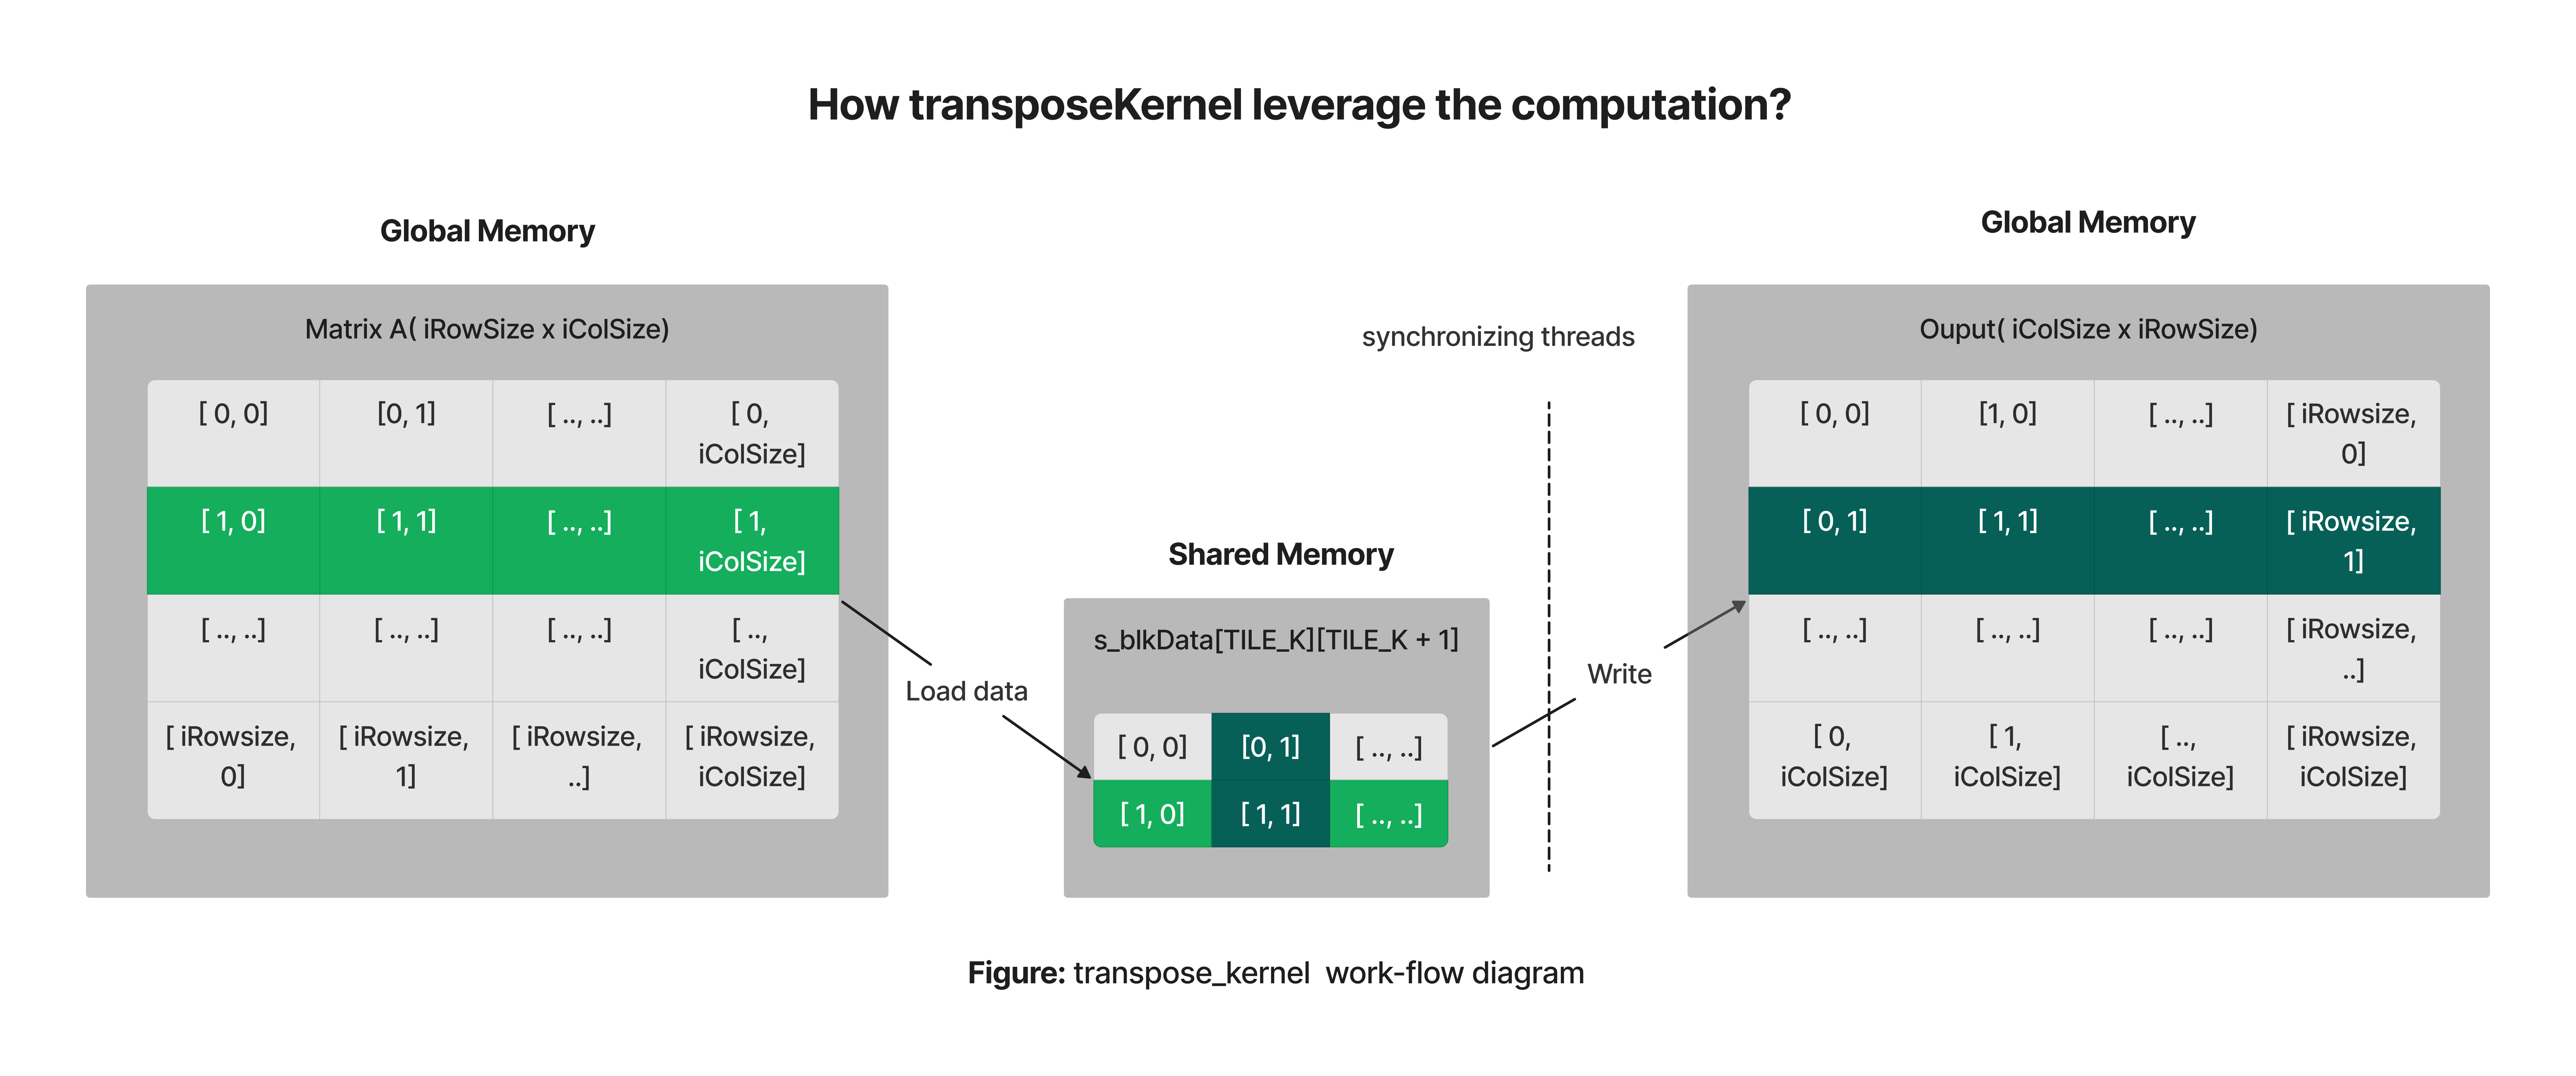

### **b. Implementation**

```markdown
### transpose_kernel Function
1. Define the kernel function `transpose_kernel` with parameters:
   - `input`: input matrix
   - `output`: output matrix
   - `iRowSize`: number of rows in the input matrix
   - `iColSize`: number of columns in the input matrix

2. Declare shared memory array `s_blkData` with size `TILE_K x (TILE_K + 1)`.

3. Calculate the row index `iR` and column index `iC` based on block and thread indices.

4. If `iR` is less than `iRowSize` and `iC` is less than `iColSize`:
   - Load the element from the input matrix into shared memory `s_blkData`.

5. Synchronize threads to ensure all data is loaded into shared memory.

6. Calculate the transposed row index `oR` and column index `oC` based on block and thread indices.

7. If `oR` is less than `iColSize` and `oC` is less than `iRowSize`:
   - Store the transposed element from shared memory `s_blkData` into the output matrix.

8. End of kernel function.
```
### Code analysis

- **Thread Responsibility**
Each thread uniquely identifies an element in the input matrix via its thread and block indices $iR, iC, oR, oC$.
After loading and synchronization, each thread transposes its designated data and writes it back to global memory.

- **Shared Memory Usage**
The use of shared memory optimizes access times by avoiding repeated global memory accesses.
Shared memory tiles are local to each thread block, enabling efficient in-block transpositions.

- **Avoiding Bank Conflicts**
The shared memory array s_blkDatas includes an additional column (**TILE_K** + 1) to avoid memory bank conflicts, ensuring fast access when threads read/write in parallel.

- **Boundary Handling**
Boundary checks prevent threads from accessing out-of-bounds memory locations for matrices that are not perfectly divisible by the block dimensions.

### **c. WARP divergence**

 ```cpp
if (iR < iRowSize && iC < iColSize):
//This condition determines whether a thread should load data from the input matrix into shared memory.
if (oR < iColSize && oC < iRowSize):
//This condition determines whether a thread should write data from shared memory to the output matrix.
```

These conditions check the thread's position against the boundaries of the matrix. When the matrix dimensions $(iRowSize, iColSize)$ are not multiples of **TILE_K**, some threads within a warp may satisfy these conditions while others do not, leading to warp divergence.

> For instance, if the matrix is $(100, 100)$ and **TILE_K** is 32, the blocks will be $(32 , 32)$, but at the edges, the last block will not be completely filled with valid data. In this case, threads near the boundary of the matrix may not perform the load or store operations, while others will.

**Uneven Block Sizes:** If the matrix size is not evenly divisible by the block size determined by TILE_K, threads at the edges of the processing blocks will take different paths. Some threads may perform the memory access and transpose, while others may be skipped due to the conditional check. This difference in execution paths causes divergence.

> Example: In the provided code, **TILE_K** is 32. Assume the input matrix is of size $(60, 60)$. The kernel will launch blocks of $(32, 32)$. So, for the first block of $(32, 32)$, all threads execute the same instruction. The second block of size $(28, 28)$ in the $x$ direction and 32 in the y direction, threads whose indices go beyond the $(60, 60)$ matrix will not load data into shared memory. These threads will be idle, and it will cause warp divergence because the threads within the warp will follow different execution paths. The last block will be $(28, 28)$, and a similar pattern of divergence will occur.

### **d. Memory use analysis**

**Global Memory:**

* **Input Matrix:**
    * The input matrix is read from global memory.
    * Each thread reads one element from the input matrix based on its calculated row index ($iR$) and column index ($iC$).
    * The read address is determined by the formula:
        ```cpp
        input[iR * iColSize + iC]
        ```
    * This access pattern, where threads in a warp access non-contiguous locations in memory, is not fully coalesced.

* **Output Matrix:**
    * The transposed output matrix is written back to global memory.
    * Each thread writes a single element based on its calculated row index ($oR$) and column index ($oC$).
    * The write address is:
        ```cpp
        output[oR * iRowSize + oC]
        ```
    * This write pattern, similar to the read pattern, is not fully coalesced either.

**Shared Memory:**

* **s_blkData:**
    * A shared memory array, `s_blkData`, of size `TILE_K x TILE_K + 1` is used.
    * Each thread loads a single element from the input matrix from global memory to this shared memory location, based on its `threadIdx.x` and `threadIdx.y`.
    * The shared memory acts as a fast, on-chip buffer for the input matrix tile that is being transposed.
    * The data is loaded into shared memory using:
        ```cpp
        s_blkData[threadIdx.x][threadIdx.y] = input[iR * iColSize + iC];`
        ```

* **Data Reuse:**
    * The data in shared memory is reused within the block to perform the transpose operation.
    * Each thread reads from shared memory at a transposed location to write to the global memory, effectively transposing the tile of the input matrix.
    * The data in the shared memory is reused within the block, and each thread accesses one element at one location and writes it to another.

**Memory Access Pattern:**

* **Non-Coalesced Global Reads/Writes:**
    * The global memory access pattern for both reads and writes is not coalesced.
    * In a coalesced access pattern, threads in a warp would access contiguous memory locations, optimizing the access to global memory.
    * However, the memory access patterns in the provided code do not always follow this pattern.
    * Threads read and write to non-contiguous memory addresses in the input and output matrices, which can lead to reduced performance.

* **Coalesced Shared Memory Access:**
    * Shared memory is accessed in a coalesced fashion.
    * Each thread accesses one location of the shared memory and reads one element from there.

The `transpose_kernel` relies on global memory for input and output storage, while utilizing fast shared memory for local data manipulation, specifically through the use of tiling.  The non-coalesced global memory access pattern can reduce performance, which is why shared memory is critical for performance in this function. The use of shared memory and tiling helps improve the cache efficiency of shared memory and reduces latency by loading the data once in shared memory.

Based on this, it is clear that any attempt to improve the performance of the `transpose_kernel` will require a closer look at global memory access patterns and an effort to make them more coalesced. Additionally, the use of shared memory can be further optimized, if necessary.



## **3. softmaxKernel Function**
### **a. Design**




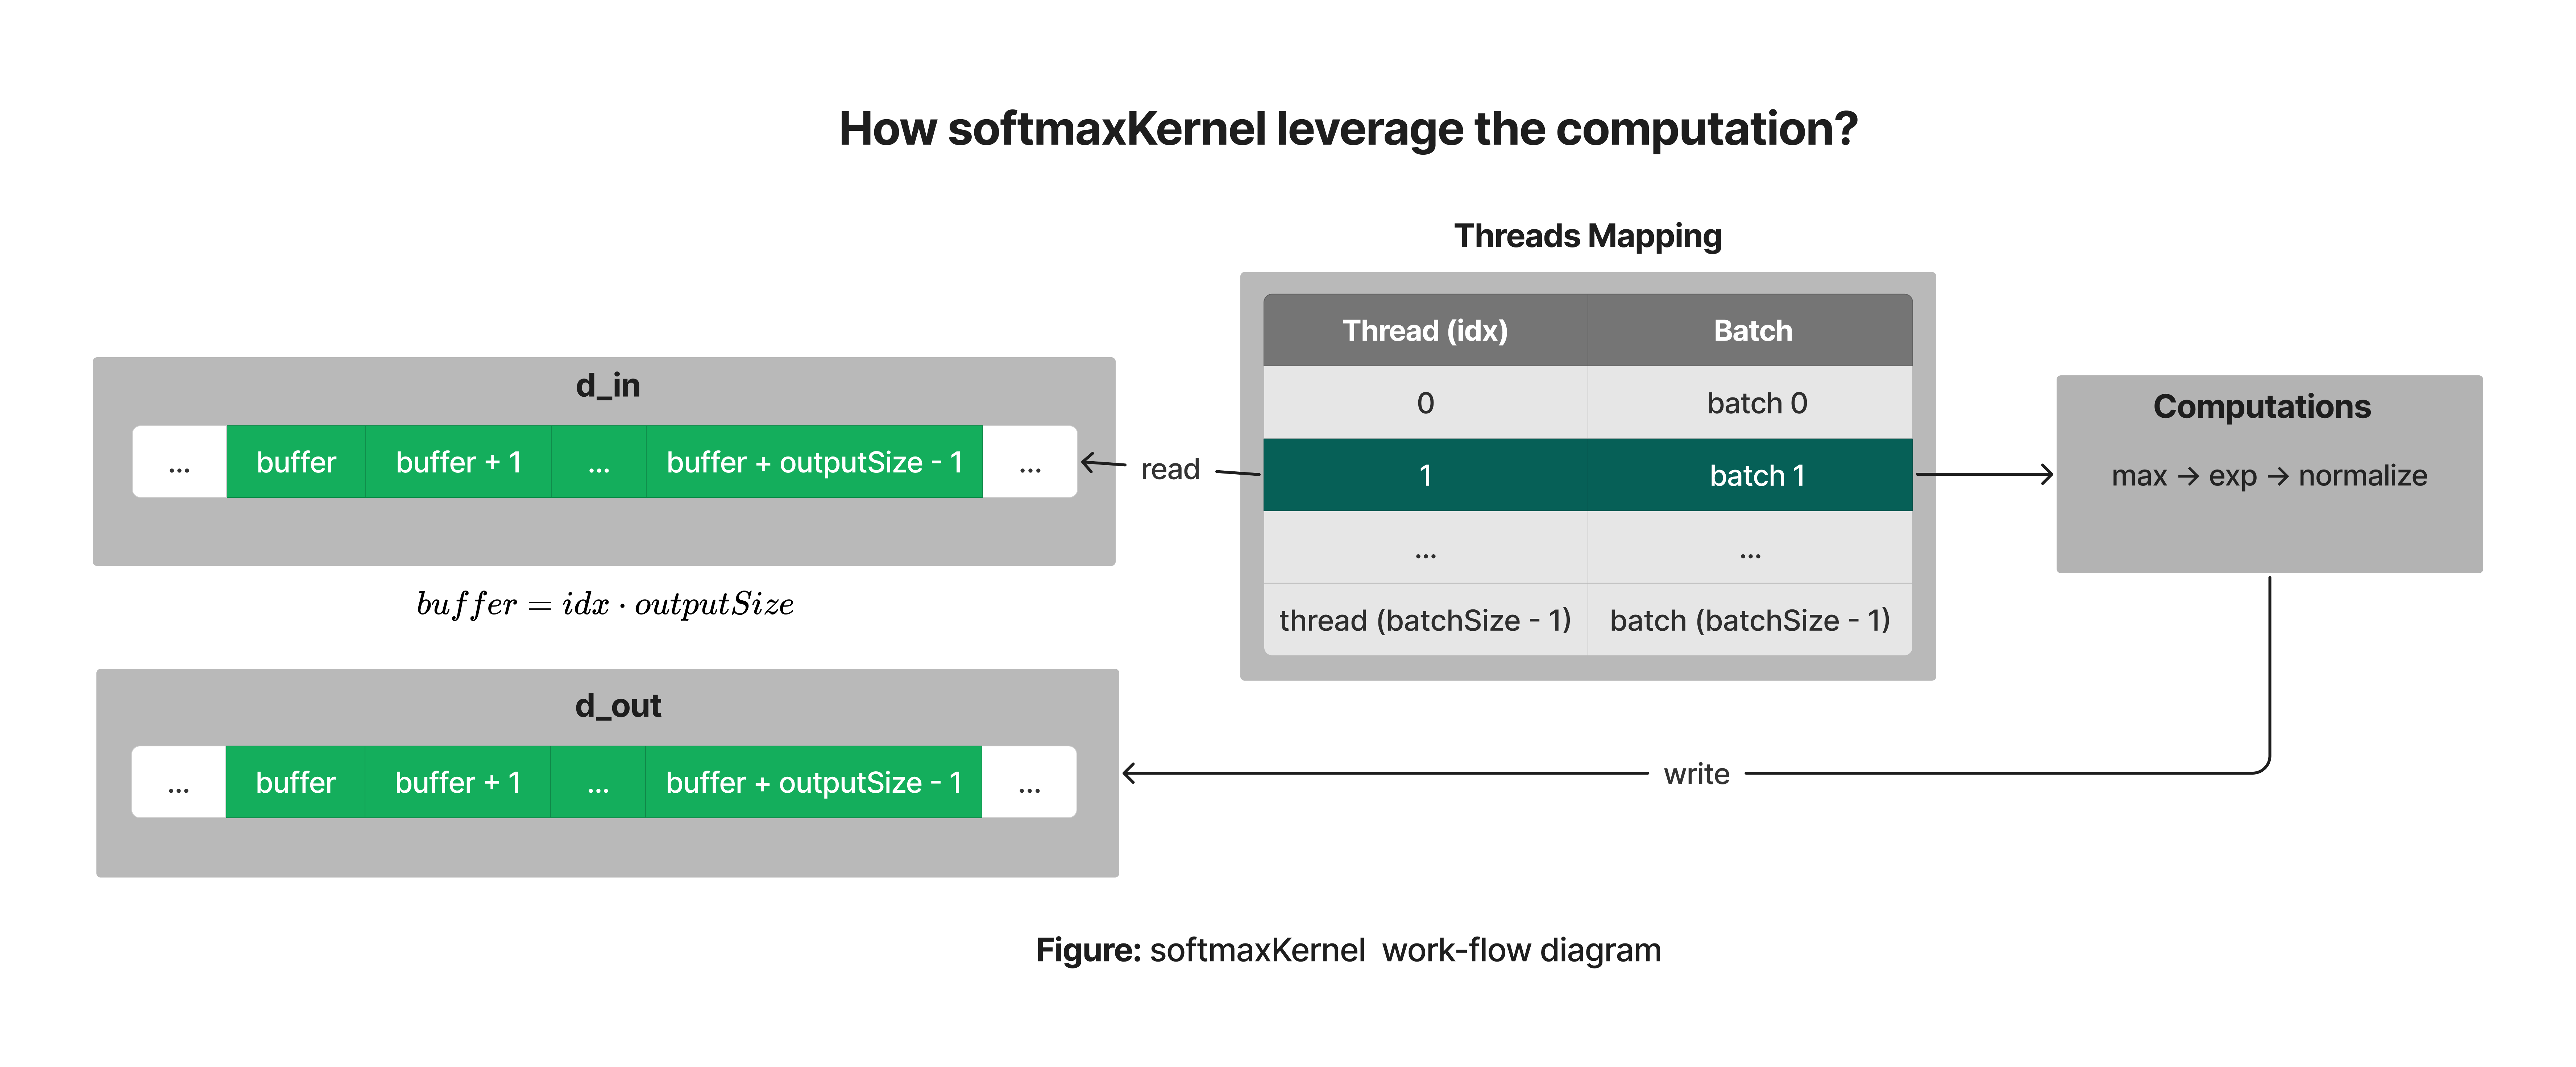

**Computation fomular**

- Each thread processes a segment of the input corresponding to its batch:

$$
\text{buffer} = \text{idx} \cdot \text{outputSize}
$$

- The maximum value in the segment is computed as:

$$
\text{max_val} = \max_{i \in \{0, 1, \dots, \text{outputSize} - 1\}} \left( d_{\text{in}}[\text{buffer} + i] \right)
$$


- For each element in the segment, an exponential transformation is applied, and their sum is calculated:
$$
d_{\text{out}}[\text{buffer} + i] = \exp\left(d_{\text{in}}[\text{buffer} + i] - \text{max_val}\right)
$$

$$
\text{sum} = \sum_{i=0}^{\text{outputSize} - 1} d_{\text{out}}[\text{buffer} + i]
$$


### **b. Implementation**

```markdown
### softmaxKernel Function
1. Define the kernel function `softmaxKernel` with parameters:
   - `d_in`: input array
   - `d_out`: output array
   - `batchSize`: number of batches
   - `outputSize`: size of each output

2. Calculate the global index `idx` based on block and thread indices.

3. If `idx` is less than `batchSize`:
   - Calculate the buffer index as `idx * outputSize`.
   - Initialize `max_val` to the first element of the input array at the buffer index.
   - Loop through the remaining elements in the output size to find the maximum value `max_val`.

4. Initialize `sum` to 0.0.

5. Loop through the elements in the output size:
   - Calculate the exponential of the difference between the input element and `max_val`.
   - Store the result in the output array.
   - Update `sum` by adding the result.

6. Loop through the elements in the output size again:
   - Normalize each element in the output array by dividing it by `sum`.

7. End of kernel function.
```

### Code Analysis

- **Thread Responsibility**: Each thread processes a unique batch of data identified by its global thread index. It calculates the maximum value, computes exponentials, and normalizes the results for its designated batch.

- **Numerical Stability**: By subtracting the maximum value from each element before computing the exponential, the kernel ensures numerical stability, preventing overflow and underflow issues.

- **Parallel Execution**: The kernel leverages the GPU's parallel processing capabilities, with each thread independently handling a batch, thus speeding up the computation.

- **Boundary Handling**: The kernel includes boundary checks to ensure threads do not access out-of-bounds memory, which is crucial for handling cases where the number of batches is not perfectly divisible by the block size.

### **c. WARP divergence**


 ```cpp
int idx = blockDim.x * blockIdx.x + threadIdx.x;
if (idx < batchSize) {
    ...
}
```

This `condition checks` if the thread index is within bounds. If $batchSize$ is not a multiple of the total number of threads, warp occur


> For example, the last $batch$ remain 18 samples but there are 32 threads in a Warp so there are 14 threads would execute the **doing nothing** path.


### **d. Memory use analysis**
1. **Input Data Access**:
   - Each thread accesses a segment of size `outputSize` starting at `buffer = idx * outputSize`.
   - Access Pattern:
     - Coalesced memory access if `d_in` is organized in row-major order and `outputSize` is large enough.
     - Strided access may occur if `outputSize` is small, reducing memory efficiency.

2. **Output Data Storage**:
   - Each thread writes to a segment of size `outputSize` in `d_out`, starting at the same `buffer`.
   - Access Pattern:
     - Coalesced writes for large `outputSize`.
     - Potential contention if multiple threads write closely in memory, depending on thread-block organization.

4. **Registers**:
   - Temporary variables like `max_val`, `sum`, and loop indices are stored in registers.
   - Each thread uses:
     - `1` register for `max_val`.
     - `1` register for `sum`.
     - Additional registers for loop counters and intermediate values.

The efficiency of global memory bandwidth is significantly influenced by the `outputSize`. When `outputSize` is large, threads can access contiguous memory locations, which optimizes coalescing and improves performance. Conversely, a small `outputSize` can lead to strided access patterns that negatively impact performance. Additionally, writing to `d_out` becomes efficient when `outputSize` is sufficiently large to support coalesced writes, reducing memory contention.


## **4. Gradient computation**

### **a. Design**

The main purpose of this kernel is to efficiently accumulate the gradients for each bias term by summing gradients from different samples in the batch. The accumulation is done across all the samples in the batch.

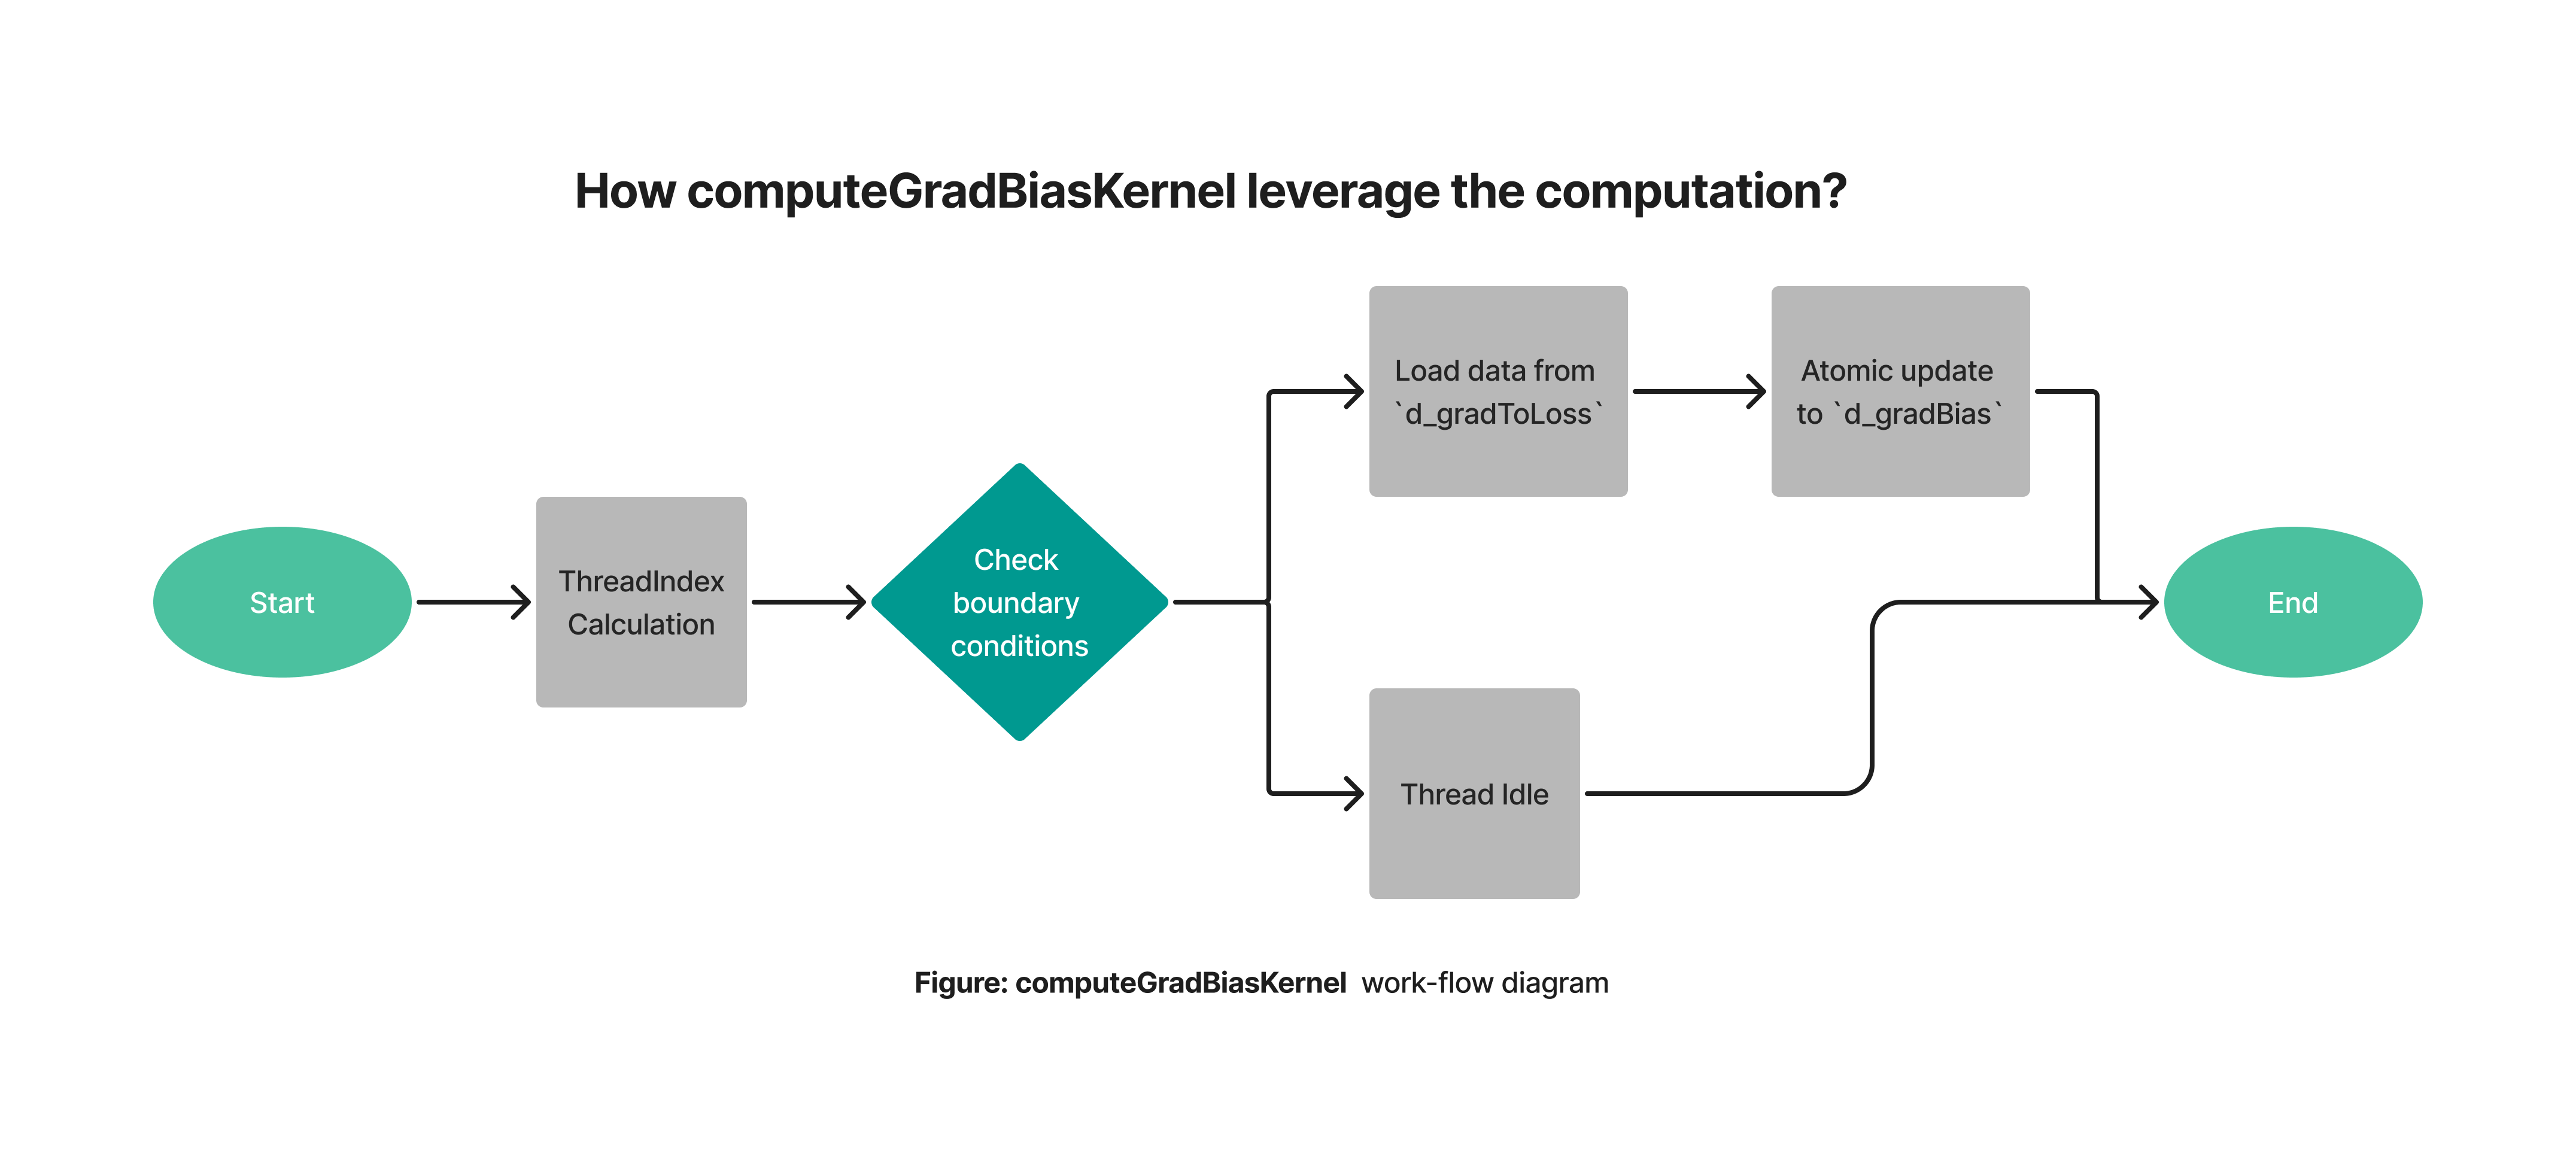

### **b. Implementation**

```markdown
### computeGradBiasKernel Function
1. Define the kernel function `computeGradBiasKernel` with parameters:
   - `d_gradBias`: gradient bias array
   - `d_gradToLoss`: gradient to loss array
   - `batchSize`: number of batches
   - `outputSize`: size of each output

2. Calculate the column index `colIdx` based on block and thread indices.

3. Calculate the row index `rowIdx` based on block and thread indices.

4. If `rowIdx` is less than `batchSize` and `colIdx` is less than `outputSize`:
   - Calculate the value `addVal` from the `d_gradToLoss` array at the position `[colIdx * outputSize + rowIdx]`.
   - Use `atomicAdd` to add `addVal` to the `d_gradBias` array at the position `[colIdx]`.

5. End of kernel function.
```
### **Key Components**
1. **Index Calculation**:
   - `colIdx`: The column index corresponds to the output neuron.
   - `rowIdx`: The row index corresponds to the batch.
   - These indices are calculated based on the thread's position in the grid and block.

2. **Boundary Conditions**:
   - `if (rowIdx < batchSize && colIdx < outputSize)`
   - Ensures that threads only operate within valid memory ranges.

3. **Gradient Addition**:
   - `atomicAdd(&d_gradBias[colIdx], addVal)`
   - Gradients for the same `colIdx` (output neuron) from different rows (batches) are summed using `atomicAdd` to prevent race conditions.


### **c. WARP divergence**

### Potential Sources of Warp Divergence
   ```c
   //Boundary Conditions:
   if (rowIdx < batchSize && colIdx < outputSize)
   ```
   - **Warp Divergence Cause**:
     - Threads in a warp may evaluate the boundary condition differently if `batchSize` and `outputSize` are not aligned with the block or grid dimensions.
     > Example: If `batchSize` or `outputSize` is not a multiple of `blockDim.x`, some threads within a warp may execute the body of the `if` condition while others do not.

To minimize this divergence, it's important to carefully design grid and block dimensions to align with data sizes.

### **d. Memory Usage Analysis**
1. **Global Memory Access**:
   - **Input Data (`d_gradToLoss`)**:
     - Access pattern:
     ```c+
     d_gradToLoss[colIdx * outputSize + rowIdx]
     ```
     - Strided access across rows (batch index). This can lead to **uncoalesced memory access** when the data layout is not optimal.

   - **Output Data (`d_gradBias`)**:
     - `d_gradBias[colIdx]` is accessed atomically for each column. This results in **contention** when multiple threads update the same index.

2. **Registers**:
   - Temporary variables like `colIdx`, `rowIdx`, and `addVal` are stored in registers.
   - Minimal register pressure as computations are straightforward.



## **5. ReLU computation**

### **a. Design**

The kernel implements the ReLU (Rectified Linear Unit) activation function, commonly used in neural networks. For each element in the input array `a`, it computes the corresponding output in `c` as `max(a[idx], 0)`.

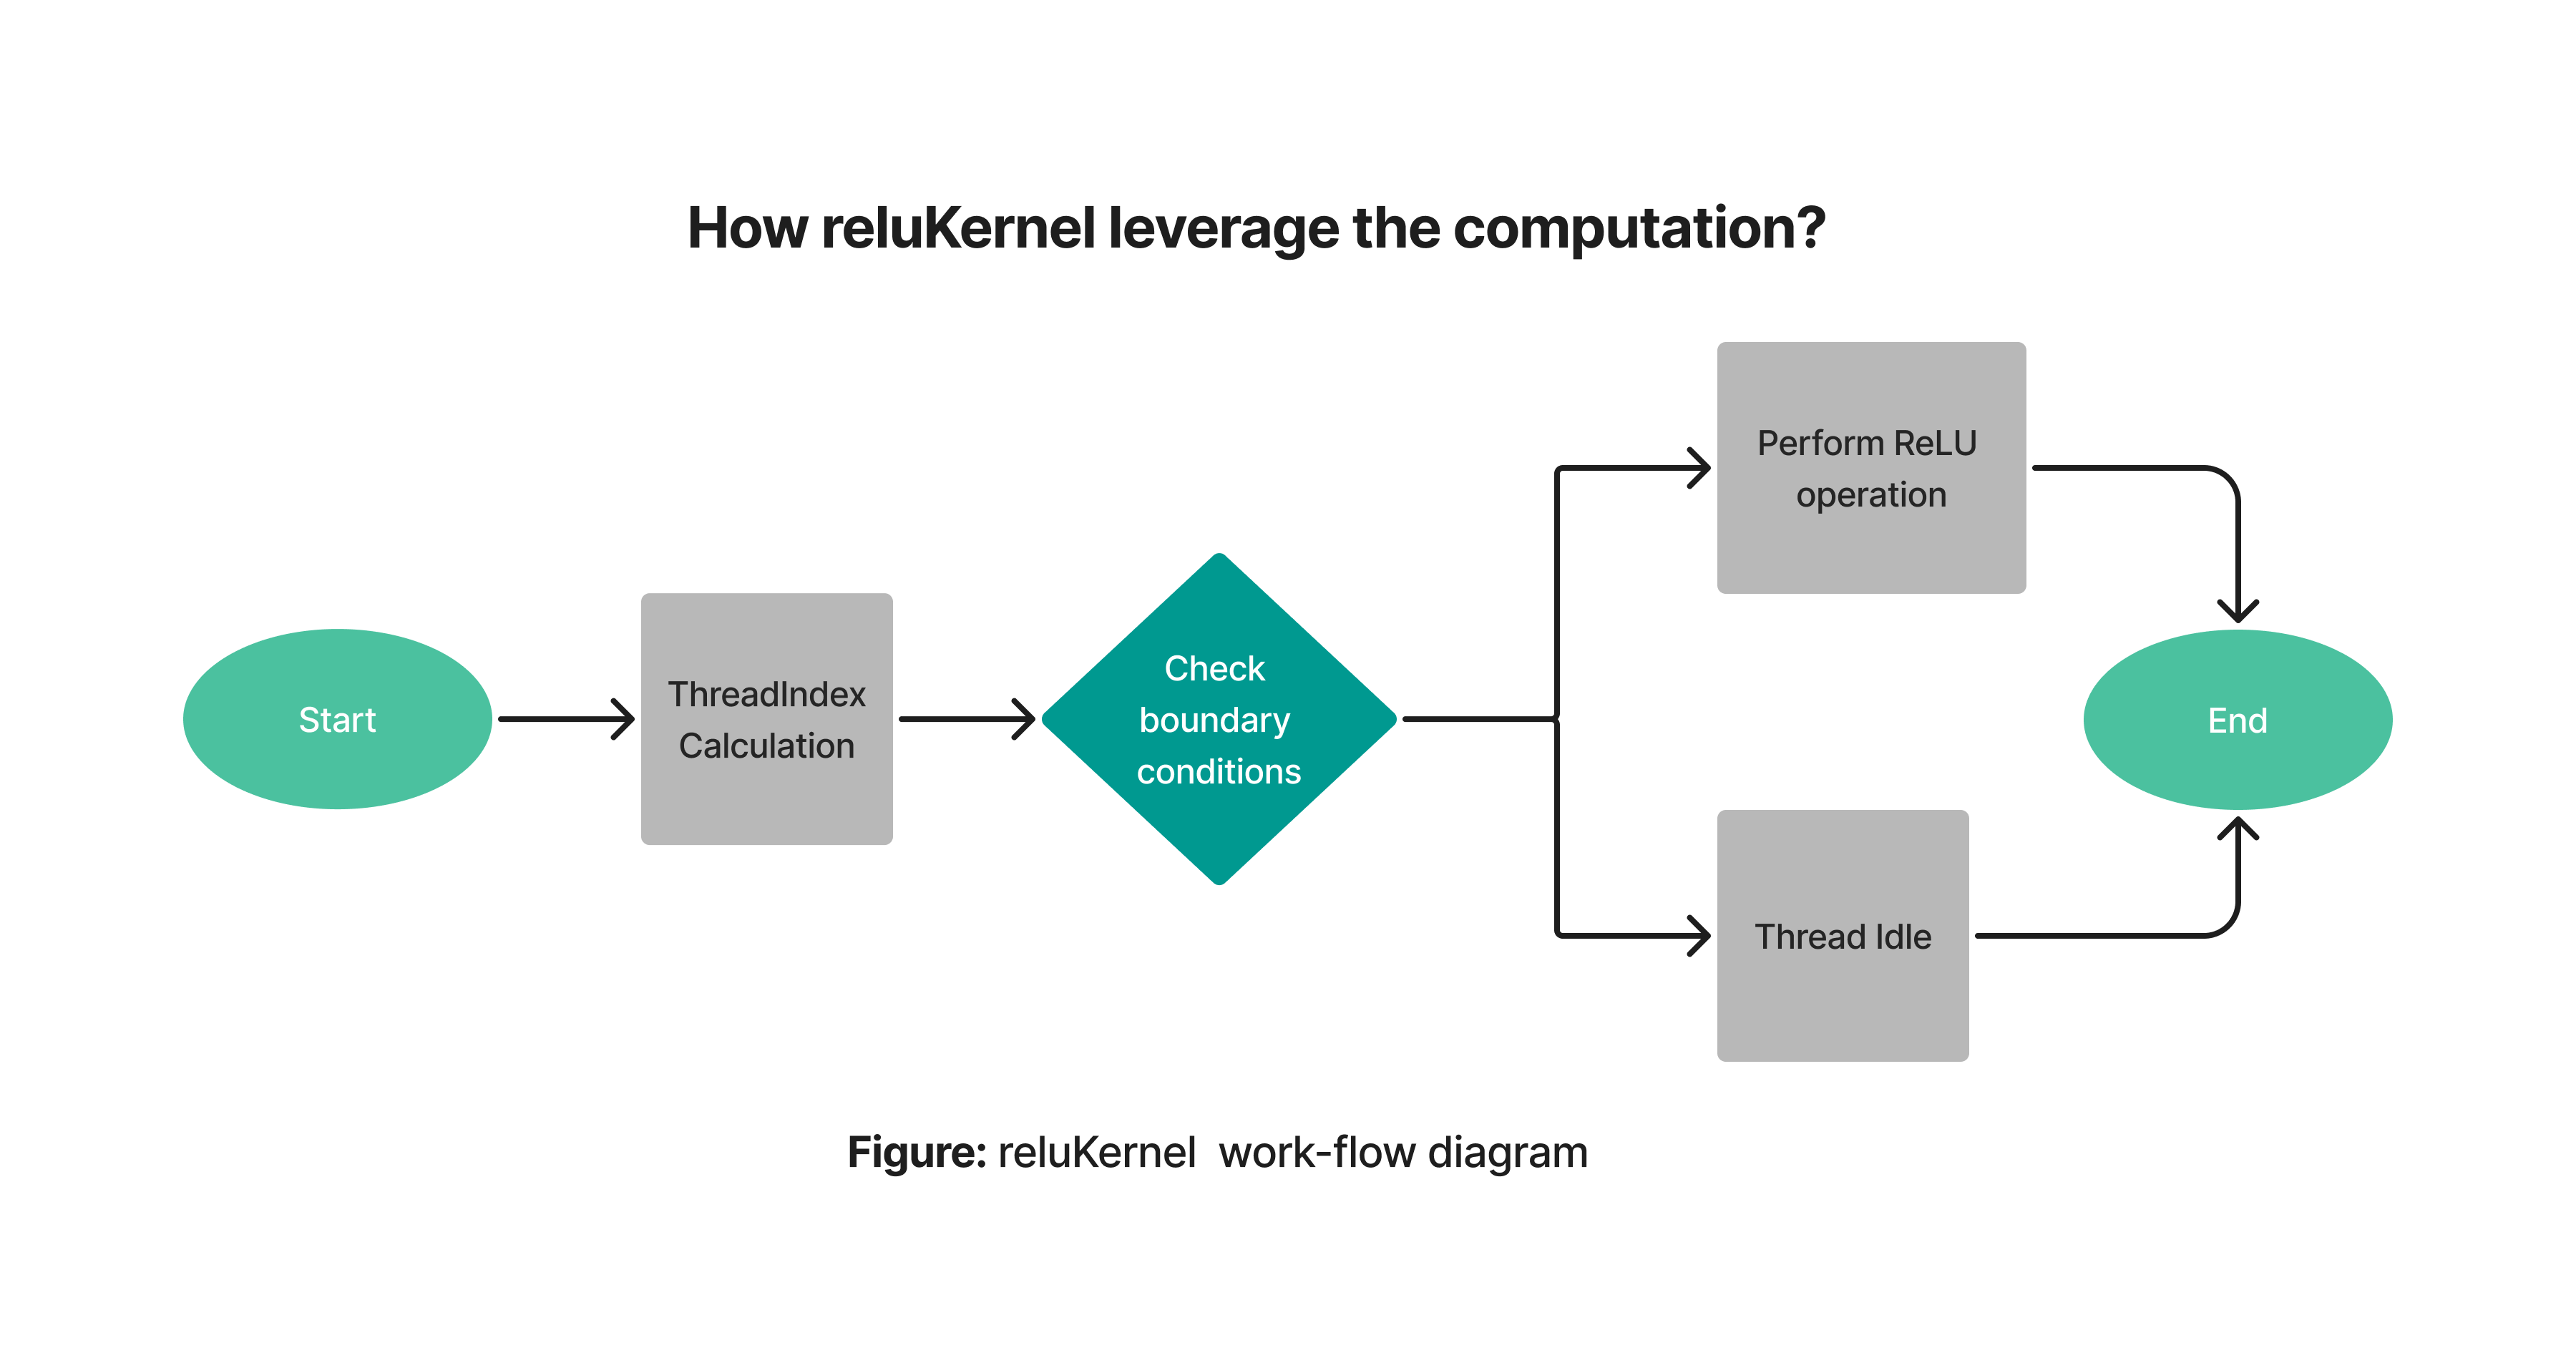

### **b. Implementation**

```markdown
### reluKernel Function
1. Define the kernel function `reluKernel` with parameters:
   - `a`: input array
   - `c`: output array
   - `totalSize`: total number of elements

2. Calculate the global index `idx` based on block and thread indices.

3. If `idx` is less than `totalSize`:
   - Apply the ReLU function to the element `a[idx]`:
     - If `a[idx]` is greater than 0.0, assign `a[idx]` to `c[idx]`.
     - Otherwise, assign 0.0 to `c[idx]`.

4. End of kernel function.

```
### Code Analysis

- **Index Calculation**: Each thread calculates its global index `idx` in the 1D grid and block structure.

- **Boundary Check**: Ensures threads only operate on valid indices within the range `[0, totalSize)`.

- **ReLU Computation**: Applies the ReLU function to the corresponding element of `a`.

### **c. WARP divergence**

- The ternary condition:
```c
if (idx < totalSize){
...// coputatiton
}
```
Introduces a potential for warp divergence, as threads within a warp may take different paths depending on the values of `a[idx]`.
- Threads with `idx >= totalSize` become idle due to the boundary check. If `totalSize` is not a multiple of `blockDim.x * gridDim.x`, some threads in the last block are underutilized.


### **d. Memory use analysis**
1. **Global Memory Access**:
   - **Input Data (`a`)**:
     - Each thread reads one element from the array `a` at `a[idx]`.
     - Access is coalesced if `a` is aligned and threads access consecutive elements.
   - **Output Data (`c`)**:
     - Each thread writes one element to the array `c` at `c[idx]`.
     - Writes are coalesced if `c` is similarly aligned.
   - **Efficiency**:
     - Global memory usage is efficient due to naturally coalesced access patterns.


2. **Compute-to-Memory Ratio**:
   - This kernel is memory-bound as each thread performs a simple comparison and assignment, with minimal computational intensity relative to memory operations.


## **6. Weight updation**

### **a. Design**

The kernel implements the ReLU (Rectified Linear Unit) activation function, commonly used in neural networks. For each element in the input array `a`, it computes the corresponding output in `c` as `max(a[idx], 0)`.

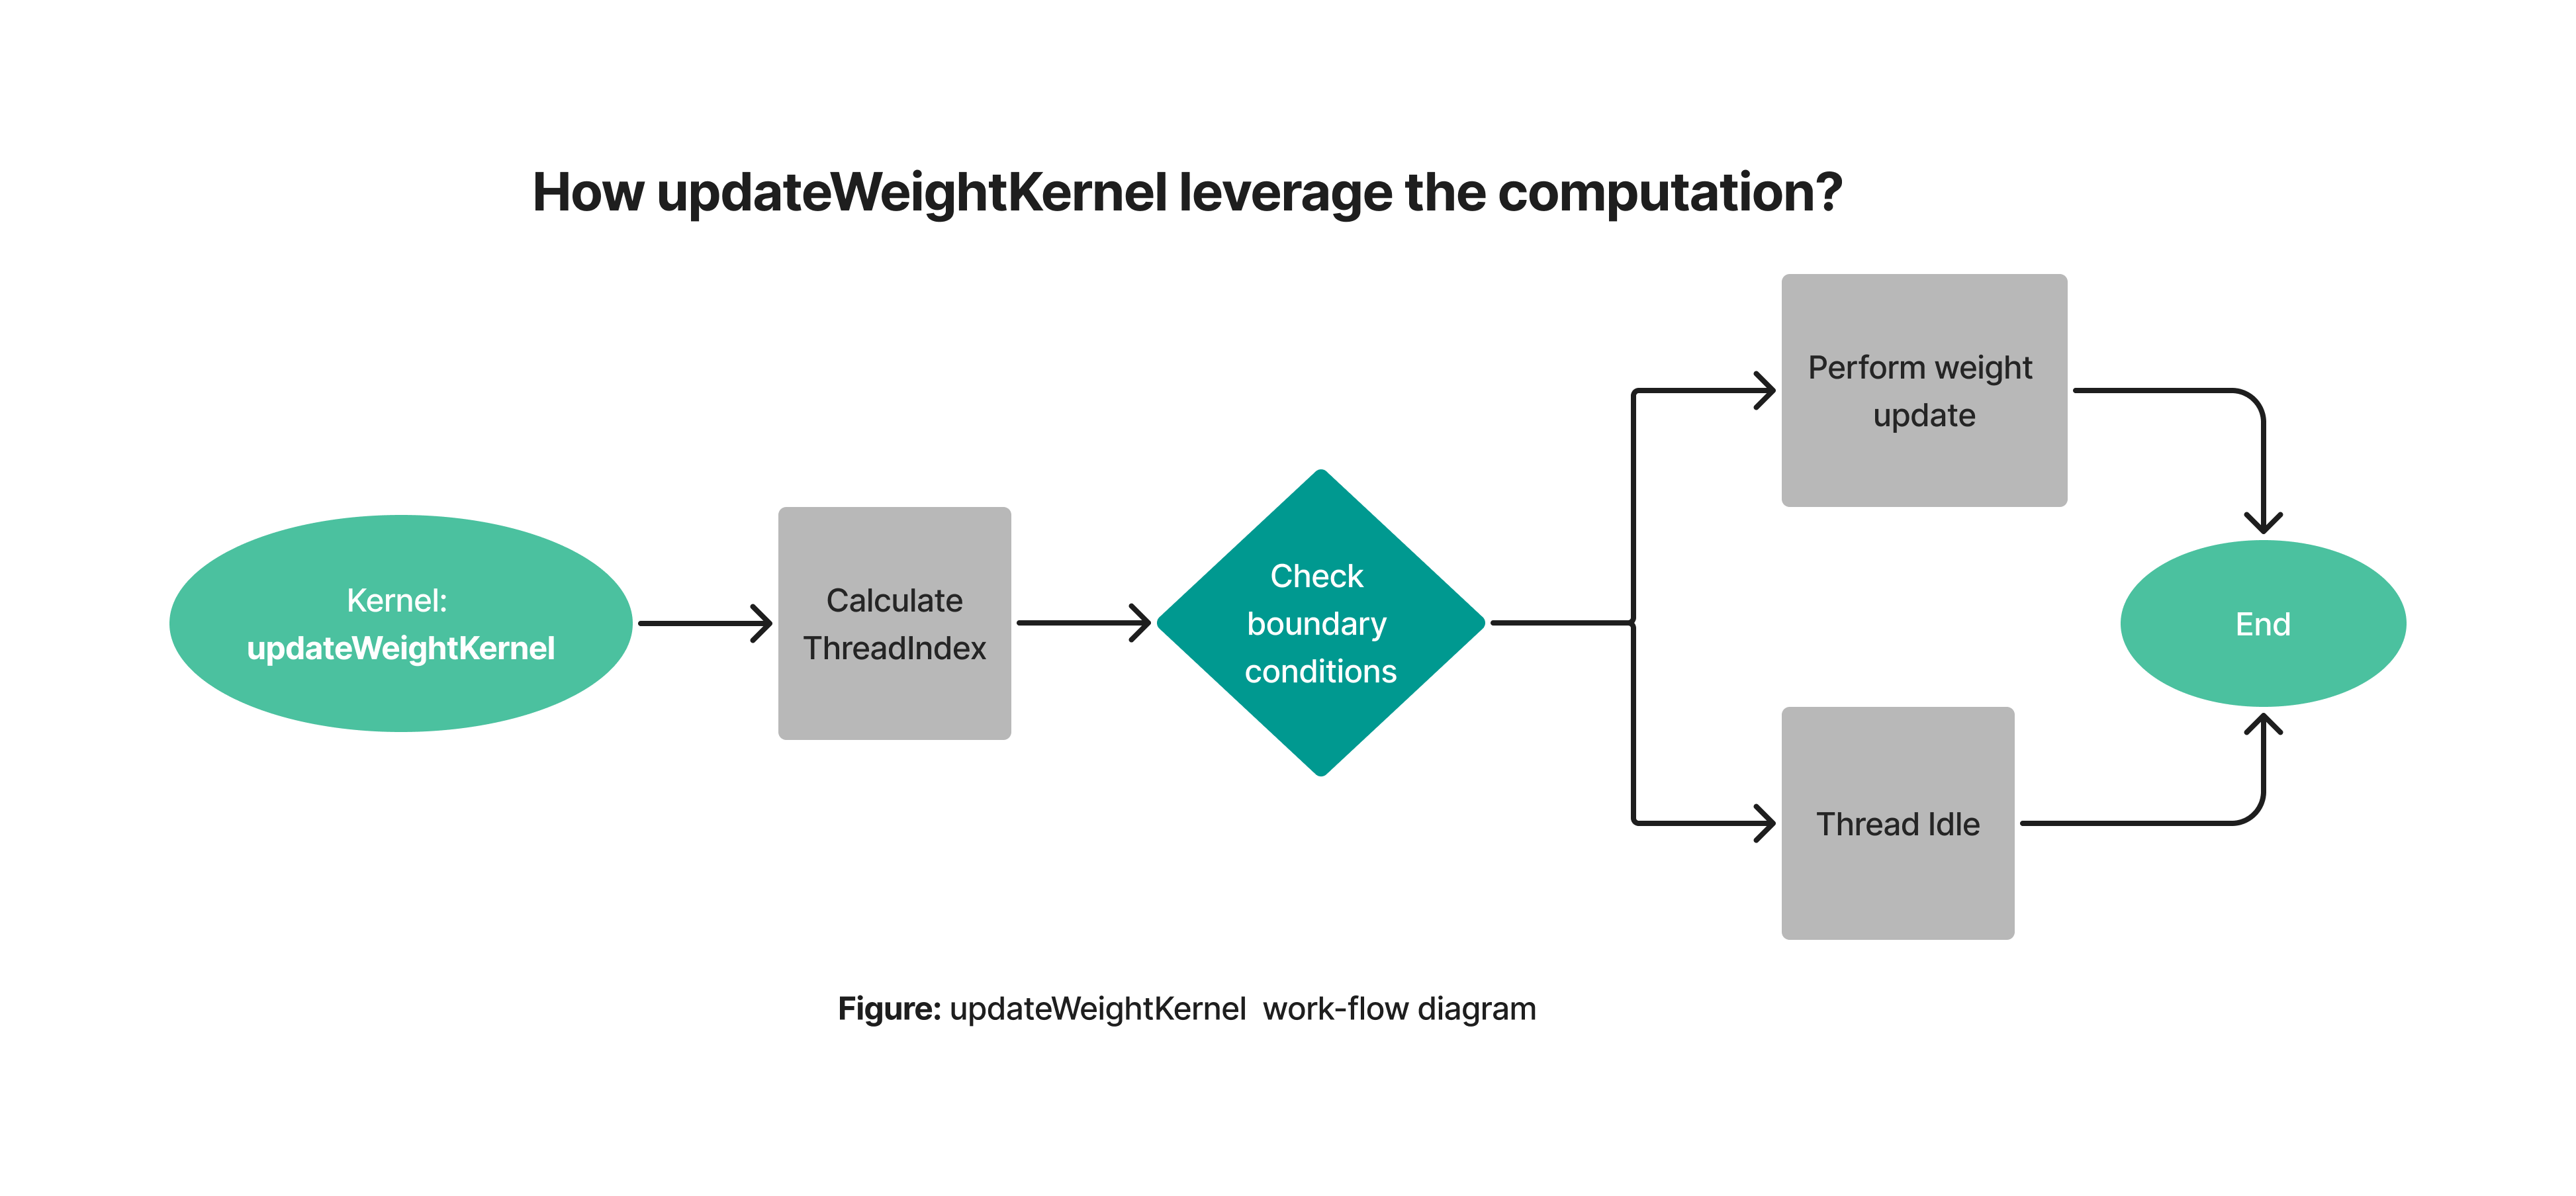

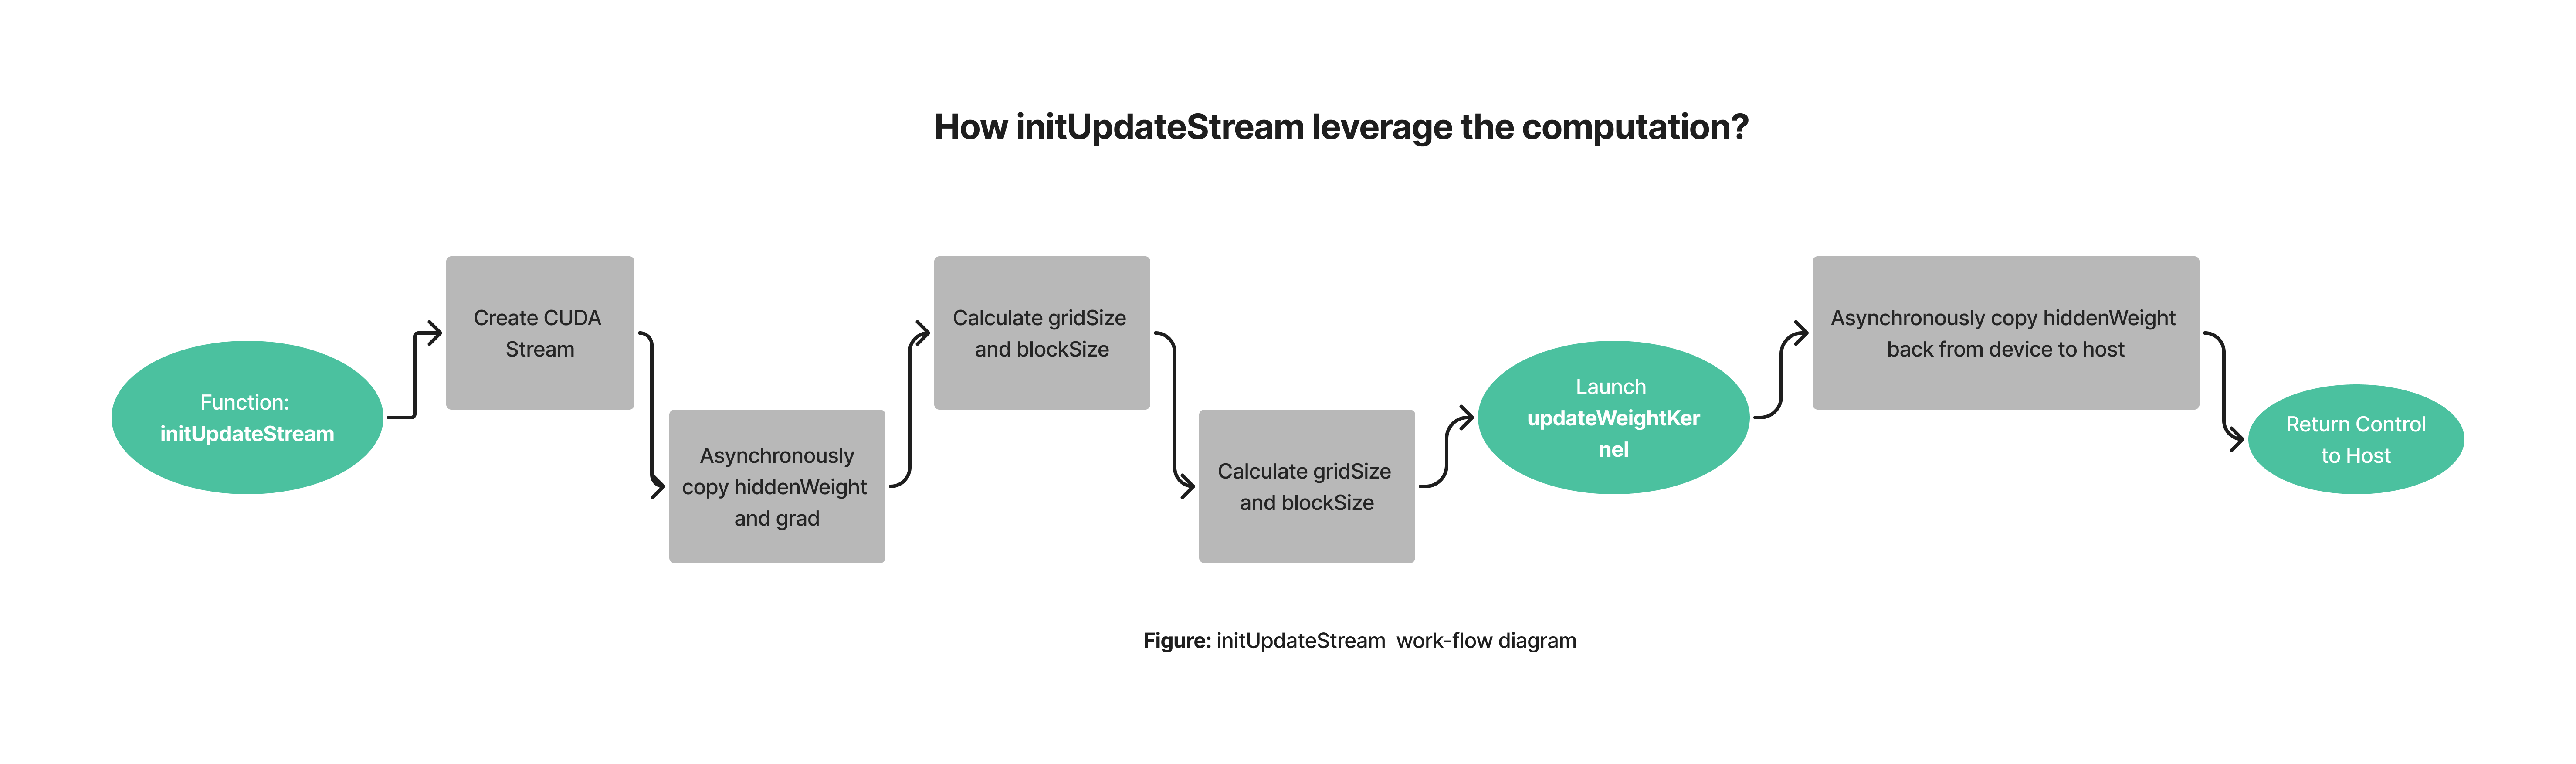

### **b. Implementation**
```markdown
### updateWeightKernel Function
1. Define the kernel function `updateWeightKernel` with parameters:
   - `hiddenWeight`: array of weights to be updated
   - `grad`: array of gradients
   - `rowSize`: number of rows
   - `colSize`: number of columns
   - `d_LR`: learning rate

2. Calculate the row index `i` and column index `j` based on block and thread indices.

3. Calculate the linear index `idx` as `i * colSize + j`.

4. If `i` is less than `rowSize` and `j` is less than `colSize`:
   - Update `hiddenWeight[idx]` by subtracting `d_LR * grad[idx]`.

5. End of kernel function.
```
### **Analysis of `updateWeightKernel`**

The `updateWeightKernel` performs weight updates based on the gradients using a learning rate (`LR`). The `initUpdateStream` function initializes the CUDA stream, handles memory transfers, and launches the kernel asynchronously to update the weights.

- **Index Calculation**:
   - Each thread calculates its row (`i`) and column (`j`) indices based on its position within the block/grid and uses them to calculate the flattened index `idx` for accessing the `hiddenWeight` and `grad` arrays.

- **Boundary Check**:
   - Threads with indices beyond the valid dimensions of the matrix (`i >= rowSize` or `j >= colSize`) are skipped, ensuring the kernel only operates within valid bounds.

- **Weight Update**:
   - Each thread updates a weight in the `hiddenWeight` matrix based on the corresponding gradient value in `grad`. The weight is updated by subtracting the product of the learning rate (`d_LR`) and the gradient (`grad[idx]`).

### **Analysis of  `initUpdateStream`**

This function initializes a CUDA stream, performs asynchronous memory transfers, and launches the kernel for weight updates:
```markdown
### initUpdateStream Function
1. Define the function `initUpdateStream` with parameters:
   - `stream`: CUDA stream
   - `hiddenWeight`: host array of weights
   - `grad`: host array of gradients
   - `d_hiddenWeight`: device array of weights
   - `d_grad`: device array of gradients
   - `rowSize`: number of rows
   - `colSize`: number of columns
   - `blockSize`: block dimensions
   - `LR`: learning rate

2. Create a CUDA stream.

3. Calculate `totalSize` as `rowSize * colSize`.

4. Copy `hiddenWeight` and `grad` from host to device asynchronously using the stream.

5. Calculate grid dimensions `gridSize` based on `colSize`, `rowSize`, and `blockSize`.

6. Launch `updateWeightKernel` with the calculated grid and block dimensions, passing the device arrays and learning rate.

7. Copy `hiddenWeight` from device to host asynchronously using the stream.

8. End of function.
```

### **Analysis of `initUpdateStream`**
- **Stream Initialization**:
   - A CUDA stream is created with `cudaStreamCreate`, enabling asynchronous operations on the GPU.

- **Asynchronous Memory Transfers**:
   - `cudaMemcpyAsync` is used to transfer the `hiddenWeight` and `grad` arrays from the host to the device (`d_hiddenWeight` and `d_grad`) and vice versa after the kernel execution.
   - This non-blocking behavior allows memory transfers and kernel execution to overlap, improving performance.

- **Grid and Block Configuration**:
   - `dim3 gridSize` calculates the grid dimensions based on the `rowSize` and `colSize` of the weight and gradient matrices and the `blockSize` of each block.
   - The grid dimensions are calculated such that all elements of the matrices are covered, with each thread handling one element.

- **Kernel Launch**:
   - The `updateWeightKernel` is launched with the computed grid and block sizes, along with the learning rate (`LR`) and matrix dimensions (`rowSize`, `colSize`).

- **Asynchronous Memory Transfer (back)**:
   - After the kernel finishes executing, the `hiddenWeight` matrix is transferred back to the host asynchronously using `cudaMemcpyAsync`.


### **c. WARP divergence and Memory use analysis**
### Performance Considerations
1. **Asynchronous Execution**:
   - By using CUDA streams (`cudaStreamCreate` and `cudaMemcpyAsync`), this code allows the kernel execution and memory transfers to overlap, leading to potential performance gains.
   - It reduces idle time by allowing computation to continue while memory transfers are in progress, especially when large matrices are involved.

2. **Kernel Efficiency**:
   - The kernel accesses global memory (`hiddenWeight` and `grad`) efficiently if the data is well-aligned, and memory access patterns are coalesced.
   - Thread utilization can be optimized by configuring the grid and block sizes appropriately based on `rowSize` and `colSize`.

3. **Thread Block and Grid Size**:
   - The grid size is calculated dynamically based on the matrix dimensions and the block size. This ensures that each matrix element is updated by exactly one thread.

4. **Memory Transfers**:
   - Using asynchronous memory copies allows for better overlap between computation and memory transfers. However, careful management of memory is required to avoid issues like data races or incorrect results due to unsynchronized access.

5. **Learning Rate and Gradient Handling**:
   - The update mechanism is straightforward and applied standard gradient-based optimization methods.


# V. Results

## **1. Load dataset**

In [ ]:
!rm -rf cuda_project
!git clone https://github.com/NguyenTuan9347/cuda_project.git

Cloning into 'cuda_project'...
remote: Enumerating objects: 356, done.
remote: Counting objects: 100% (176/176), done.
remote: Compressing objects: 100% (103/103), done.
remote: Total 356 (delta 97), reused 129 (delta 63), pack-reused 180 (from 1)
Receiving objects: 100% (356/356), 40.07 MiB | 19.47 MiB/s, done.
Resolving deltas: 100% (177/177), done.


In [ ]:
!nvidia-smi

Tue Dec 24 13:45:21 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## **2. Train model**

### **a. Without GPU acceleration**

In [ ]:
!nvcc cuda_project/kernel_colab.cu -o main.exe -diag-suppress 177

In [ ]:
!nvprof ./main.exe train cuda_project/config.txt

Layer 0 initialized: (784, 128)
Layer 1 initialized: (128, 128)
Layer 2 initialized: (128, 10)
==4488== NVPROF is profiling process 4488, command: ./main.exe train cuda_project/config.txt
==4488== Profiling application: ./main.exe train cuda_project/config.txt
==4488== Profiling result:
No kernels were profiled.
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
      API calls:   99.67%  234.71ms         2  117.36ms  1.4300us  234.71ms  cudaEventCreate
                    0.22%  516.55us         1  516.55us  516.55us  516.55us  cudaEventRecord
                    0.10%  224.12us       114  1.9650us     214ns  99.725us  cuDeviceGetAttribute
                    0.01%  11.895us         1  11.895us  11.895us  11.895us  cuDeviceGetName
                    0.00%  9.3580us         1  9.3580us  9.3580us  9.3580us  cuDeviceGetPCIBusId
                    0.00%  5.5540us         1  5.5540us  5.5540us  5.5540us  cudaEventSynchronize
                    0.00%  4.899

### **b. With GPU acceleration**

In [ ]:
!nvprof ./main.exe train cuda_project/config.txt true

Layer 0 initialized: (784, 128)
Layer 1 initialized: (128, 128)
Layer 2 initialized: (128, 10)
==4665== NVPROF is profiling process 4665, command: ./main.exe train cuda_project/config.txt true
Epoch 1, Loss: 2.1492, Accuracy: 0.2142, Time (seconds): 2.0924
Epoch 2, Loss: 1.4394, Accuracy: 0.5646, Time (seconds): 1.9561
Epoch 3, Loss: 1.0185, Accuracy: 0.6528, Time (seconds): 1.9188
Processing time (use device): 1.989131 s

==4665== Profiling application: ./main.exe train cuda_project/config.txt true
==4665== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   38.73%  373.78ms     23688  15.779us     608ns  86.814us  [CUDA memcpy HtoD]
                   33.07%  319.08ms      4512  70.718us  8.4800us  195.26us  matrixMultiKernel(float*, float*, float*, int, int, int)
                   17.28%  166.77ms     14100  11.827us  1.5990us  80.671us  [CUDA memcpy DtoH]
                    4.97%  47.928ms      1128  42.489us  22.

## **3. Test model**

In [ ]:
!./main.exe test cuda_project/config.txt

At layer 0: (784,128)
At layer 1: (128,128)
At layer 2: (128,10)
Loading weights
Loading biases
Loading best model for testing
Total accuracy: 0.877900


## **4. Experiment Setup: CUDA-Based Neural Network Training**

### **a. Device Information**
The experiment was conducted using an NVIDIA Tesla T4 GPU with the following specifications:

- **Driver Version**: 535.104.05  
- **CUDA Version**: 12.2  
- **Memory**: 15,360 MiB  
- **Compute Capability**: Supported by the Tesla T4 GPU.  

### **b. Neural Network Architecture**
The neural network consists of three layers:

- **Layer 0 (Input)**: 784 neurons, connected to 128 neurons in the first hidden layer.  
- **Layer 1 (Hidden)**: 128 neurons, connected to 128 neurons in the second hidden layer.  
- **Layer 2 (Output)**: 128 neurons, connected to 10 output neurons.

### **c. Tests Without GPU Acceleration**

Three tests were performed using only the host (CPU). Each test involved training the neural network for three epochs.

**Results Summary**:

| Test  | Epoch | Loss    | Accuracy | Time (seconds) |
|-------|-------|---------|----------|----------------|
| **1** | 1     | 2.1492  | 0.2142   | 57.1142        |
|       | 2     | 1.4394  | 0.5646   | 56.7666        |
|       | 3     | 1.0185  | 0.6528   | 55.1748        |
|       |       |         |          | **56.351871**  |
| **2** | 1     | 2.1492  | 0.2142   | 55.4279        |
|       | 2     | 1.4394  | 0.5646   | 56.3141        |
|       | 3     | 1.0185  | 0.6528   | 55.0192        |
|       |       |         |          | **55.587044**  |
| **3** | 1     | 2.1492  | 0.2142   | 56.8183        |
|       | 2     | 1.4394  | 0.5646   | 56.1657        |
|       | 3     | 1.0185  | 0.6528   | 56.4161        |
|       |       |         |          | **56.466705**  |


#### **Profiling Results**

CUDA profiling was conducted to analyze performance. Results indicate minimal utilization of GPU kernels, suggesting that the computations primarily relied on the host.  

```markdown
==10442== Profiling application: ./source/ann_cuda_project
==10442== Profiling result:
No kernels were profiled.
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
      API calls:   99.64%  93.105ms         6  15.518ms     942ns  93.090ms  cudaEventCreate
                    0.14%  134.20us       114  1.1770us     143ns  53.543us  cuDeviceGetAttribute
                    0.11%  106.61us         6  17.768us  3.1760us  32.437us  cudaEventRecord
                    0.05%  46.252us         6  7.7080us  5.8260us  9.6710us  cudaEventSynchronize
                    0.02%  15.090us         6  2.5150us     807ns  5.5600us  cudaEventDestroy
                    0.01%  11.816us         1  11.816us  11.816us  11.816us  cuDeviceGetName
                    0.01%  8.5890us         3  2.8630us  2.4070us  3.2640us  cudaEventElapsedTime
                    0.01%  4.9330us         1  4.9330us  4.9330us  4.9330us  cuDeviceGetPCIBusId
                    0.01%  4.6850us         1  4.6850us  4.6850us  4.6850us  cuDeviceTotalMem
                    0.00%  1.2520us         3     417ns     184ns     787ns  cuDeviceGetCount
                    0.00%  1.2380us         2     619ns     176ns  1.0620us  cuDeviceGet
                    0.00%     553ns         1     553ns     553ns     553ns  cuDeviceGetUuid
                    0.00%     406ns         1     406ns     406ns     406ns  cuModuleGetLoadingMode

```
**API Call Breakdown**:

- **CUDA Event Operations**:  
  - `cudaEventCreate`: Dominated the execution time (99.64%).  
  - `cudaEventRecord`, `cudaEventSynchronize`, `cudaEventDestroy`: Accounted for a small fraction of total time.
  
- **Device Attribute Queries**:  
  - Functions like `cuDeviceGetAttribute` and `cuDeviceGetName` contributed minimally to execution time.  

**Key Observations**:
- No GPU kernels were actively profiled during this experiment.
- Profiling focused on API calls, with the majority of time spent on event creation and synchronization.


### **d. Tests With GPU Acceleration**
#### **Results Summary**:

| Test  | Epoch | Loss    | Accuracy | Time (seconds) |
|-------|-------|---------|----------|----------------|
| **1** | 1     | 2.1492  | 0.2142   | 2.1826         |
|       | 2     | 1.4394  | 0.5646   | 2.3561         |
|       | 3     | 1.0185  | 0.6528   | 2.2345         |
|       |       |         |          | **2.257734**   |
| **2** | 1     | 2.1492  | 0.2142   | 2.0238         |
|       | 2     | 1.4394  | 0.5646   | 1.9602         |
|       | 3     | 1.0185  | 0.6528   | 1.9901         |
|       |       |         |          | **1.991348**   |
| **3** | 1     | 2.1492  | 0.2142   | 2.3467         |
|       | 2     | 1.4394  | 0.5646   | 2.0323         |
|       | 3     | 1.0185  | 0.6528   | 1.9455         |
|       |       |         |          | **2.108166**   |


#### **Profiling Results**


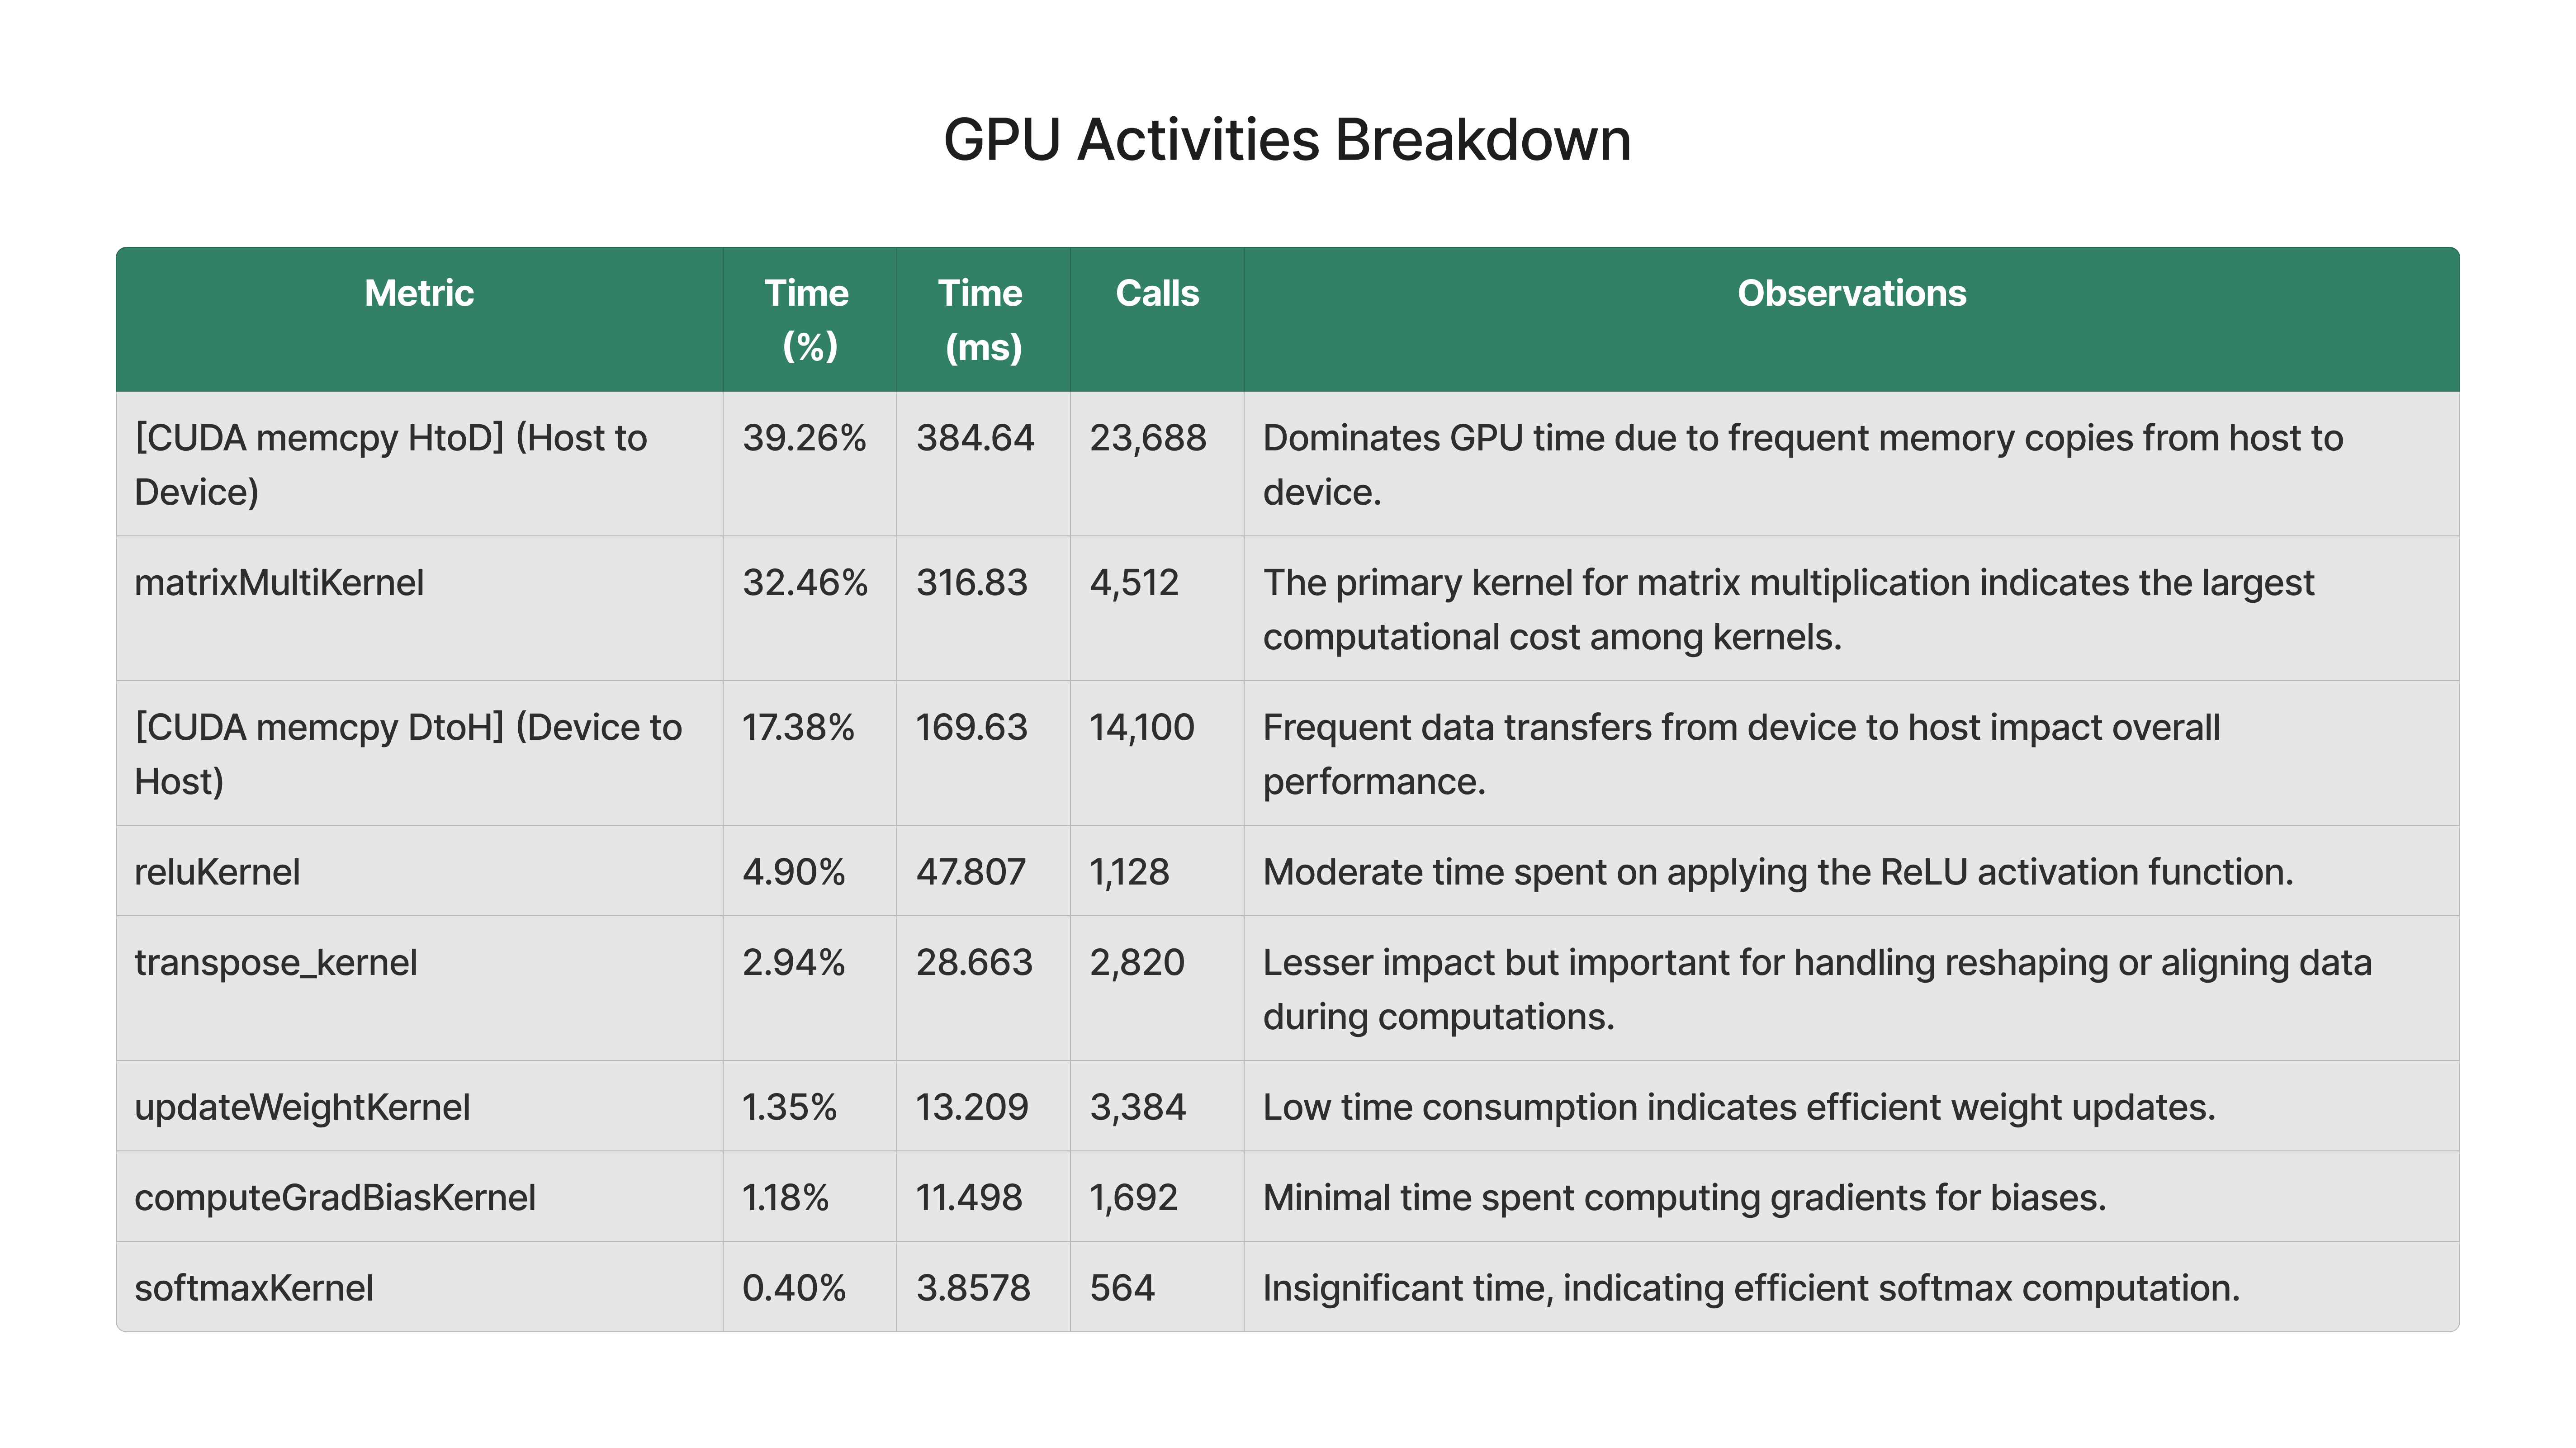

---

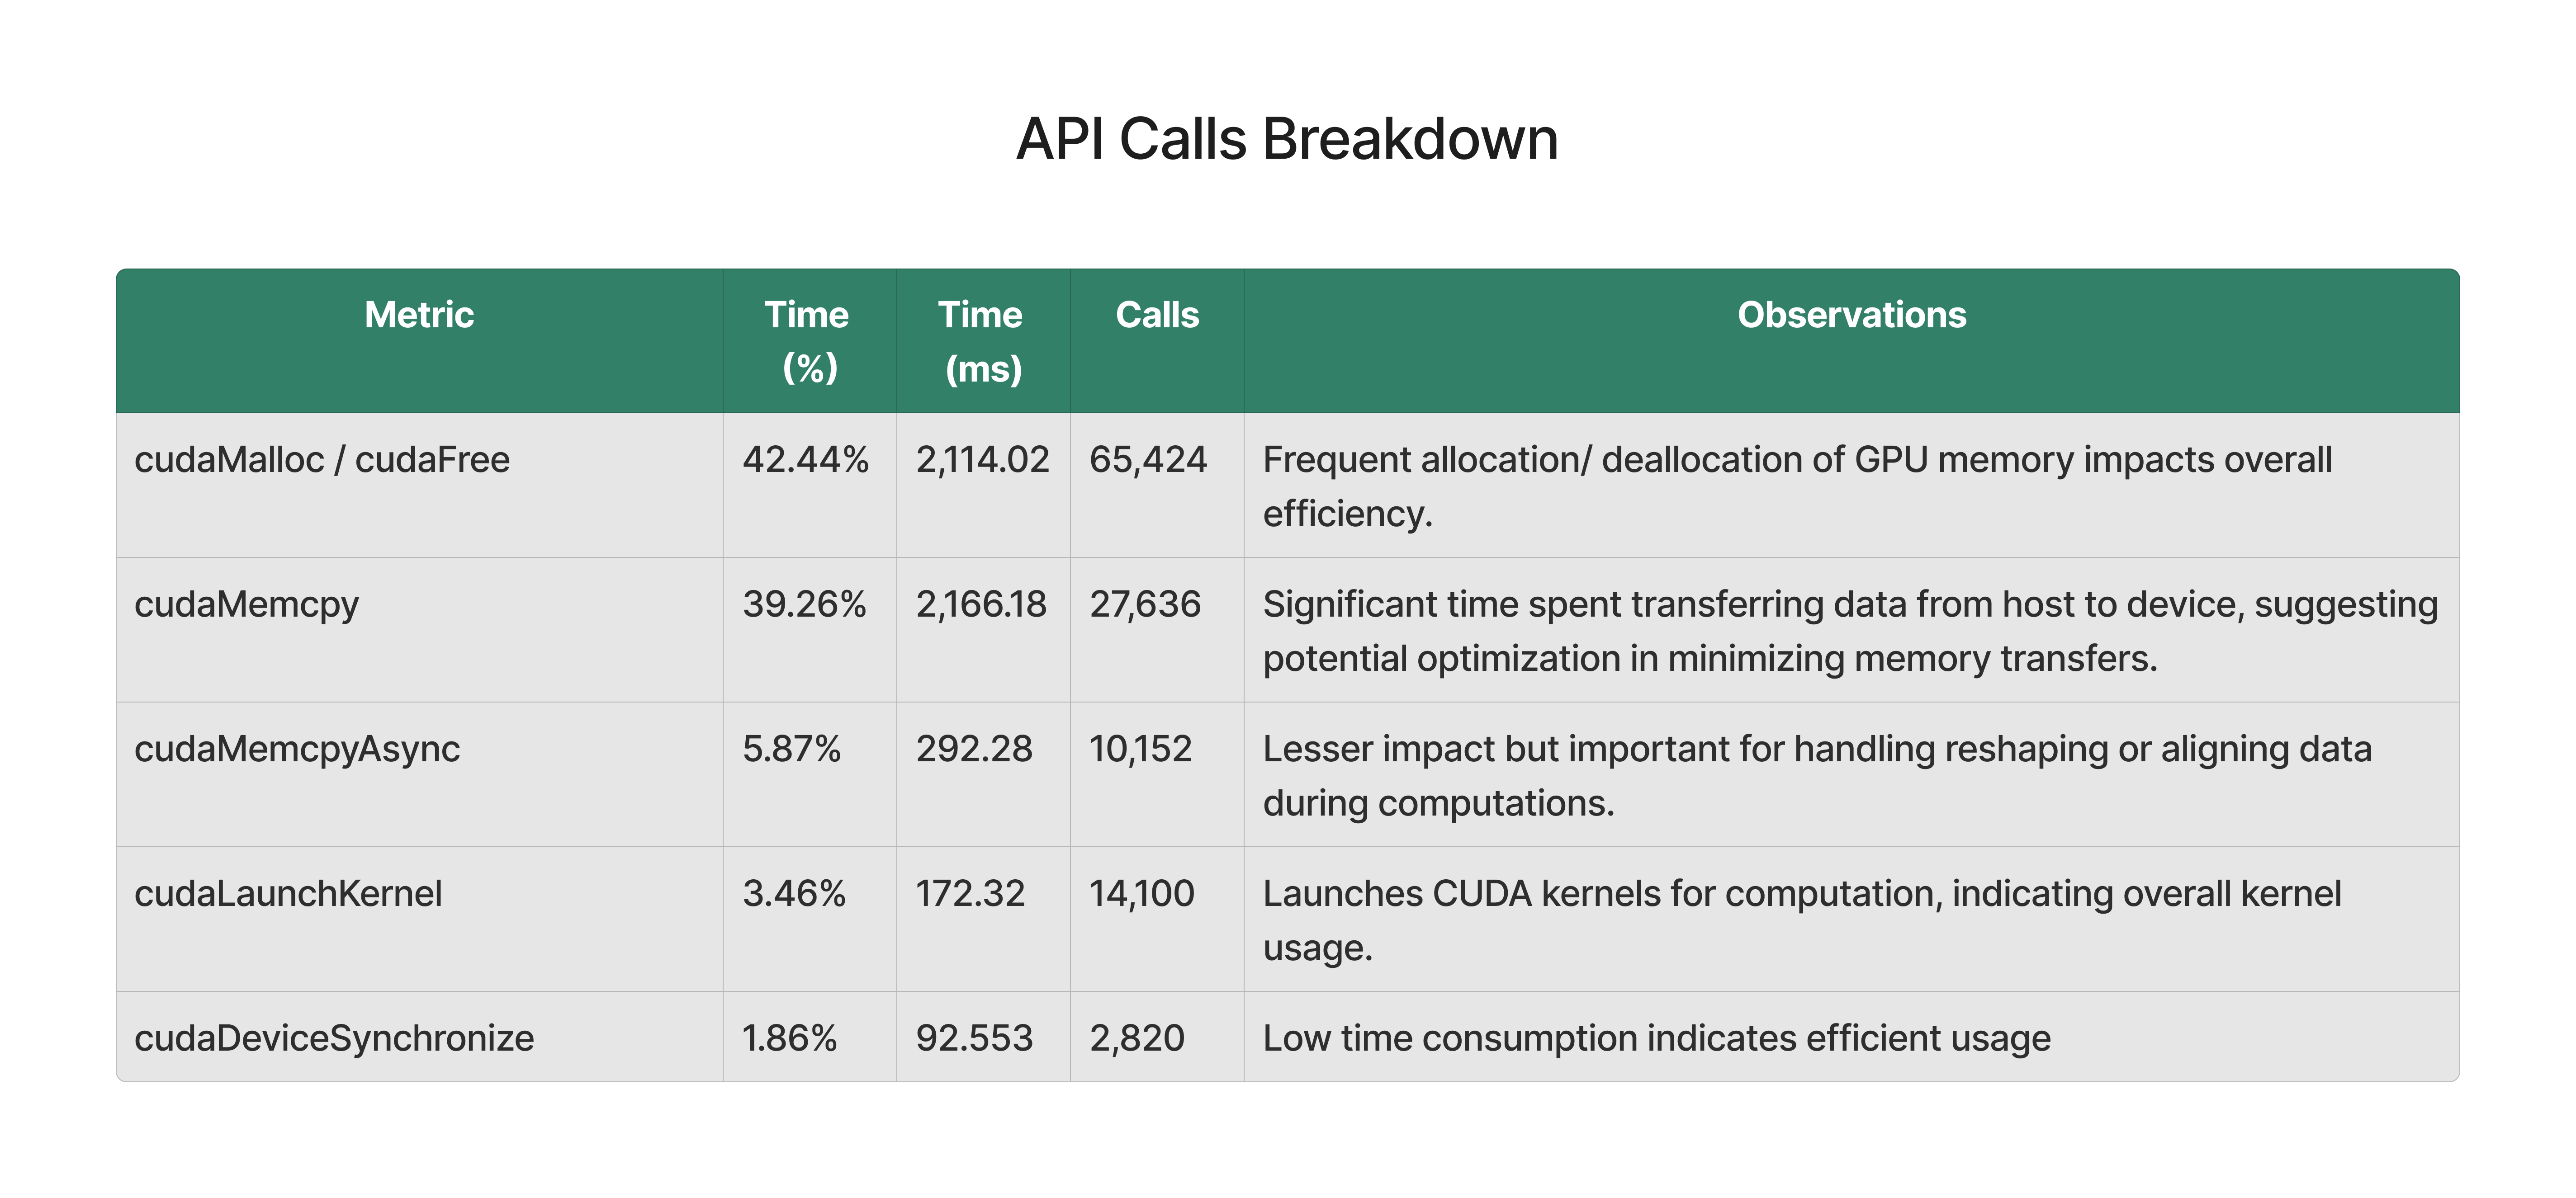

## **5. Performance Comparison: CUDA vs. Sequential Implementation**

The final CUDA implementation was compared with a sequential implementation executed on the CPU to evaluate performance gains. The comparison was conducted using the following metrics:


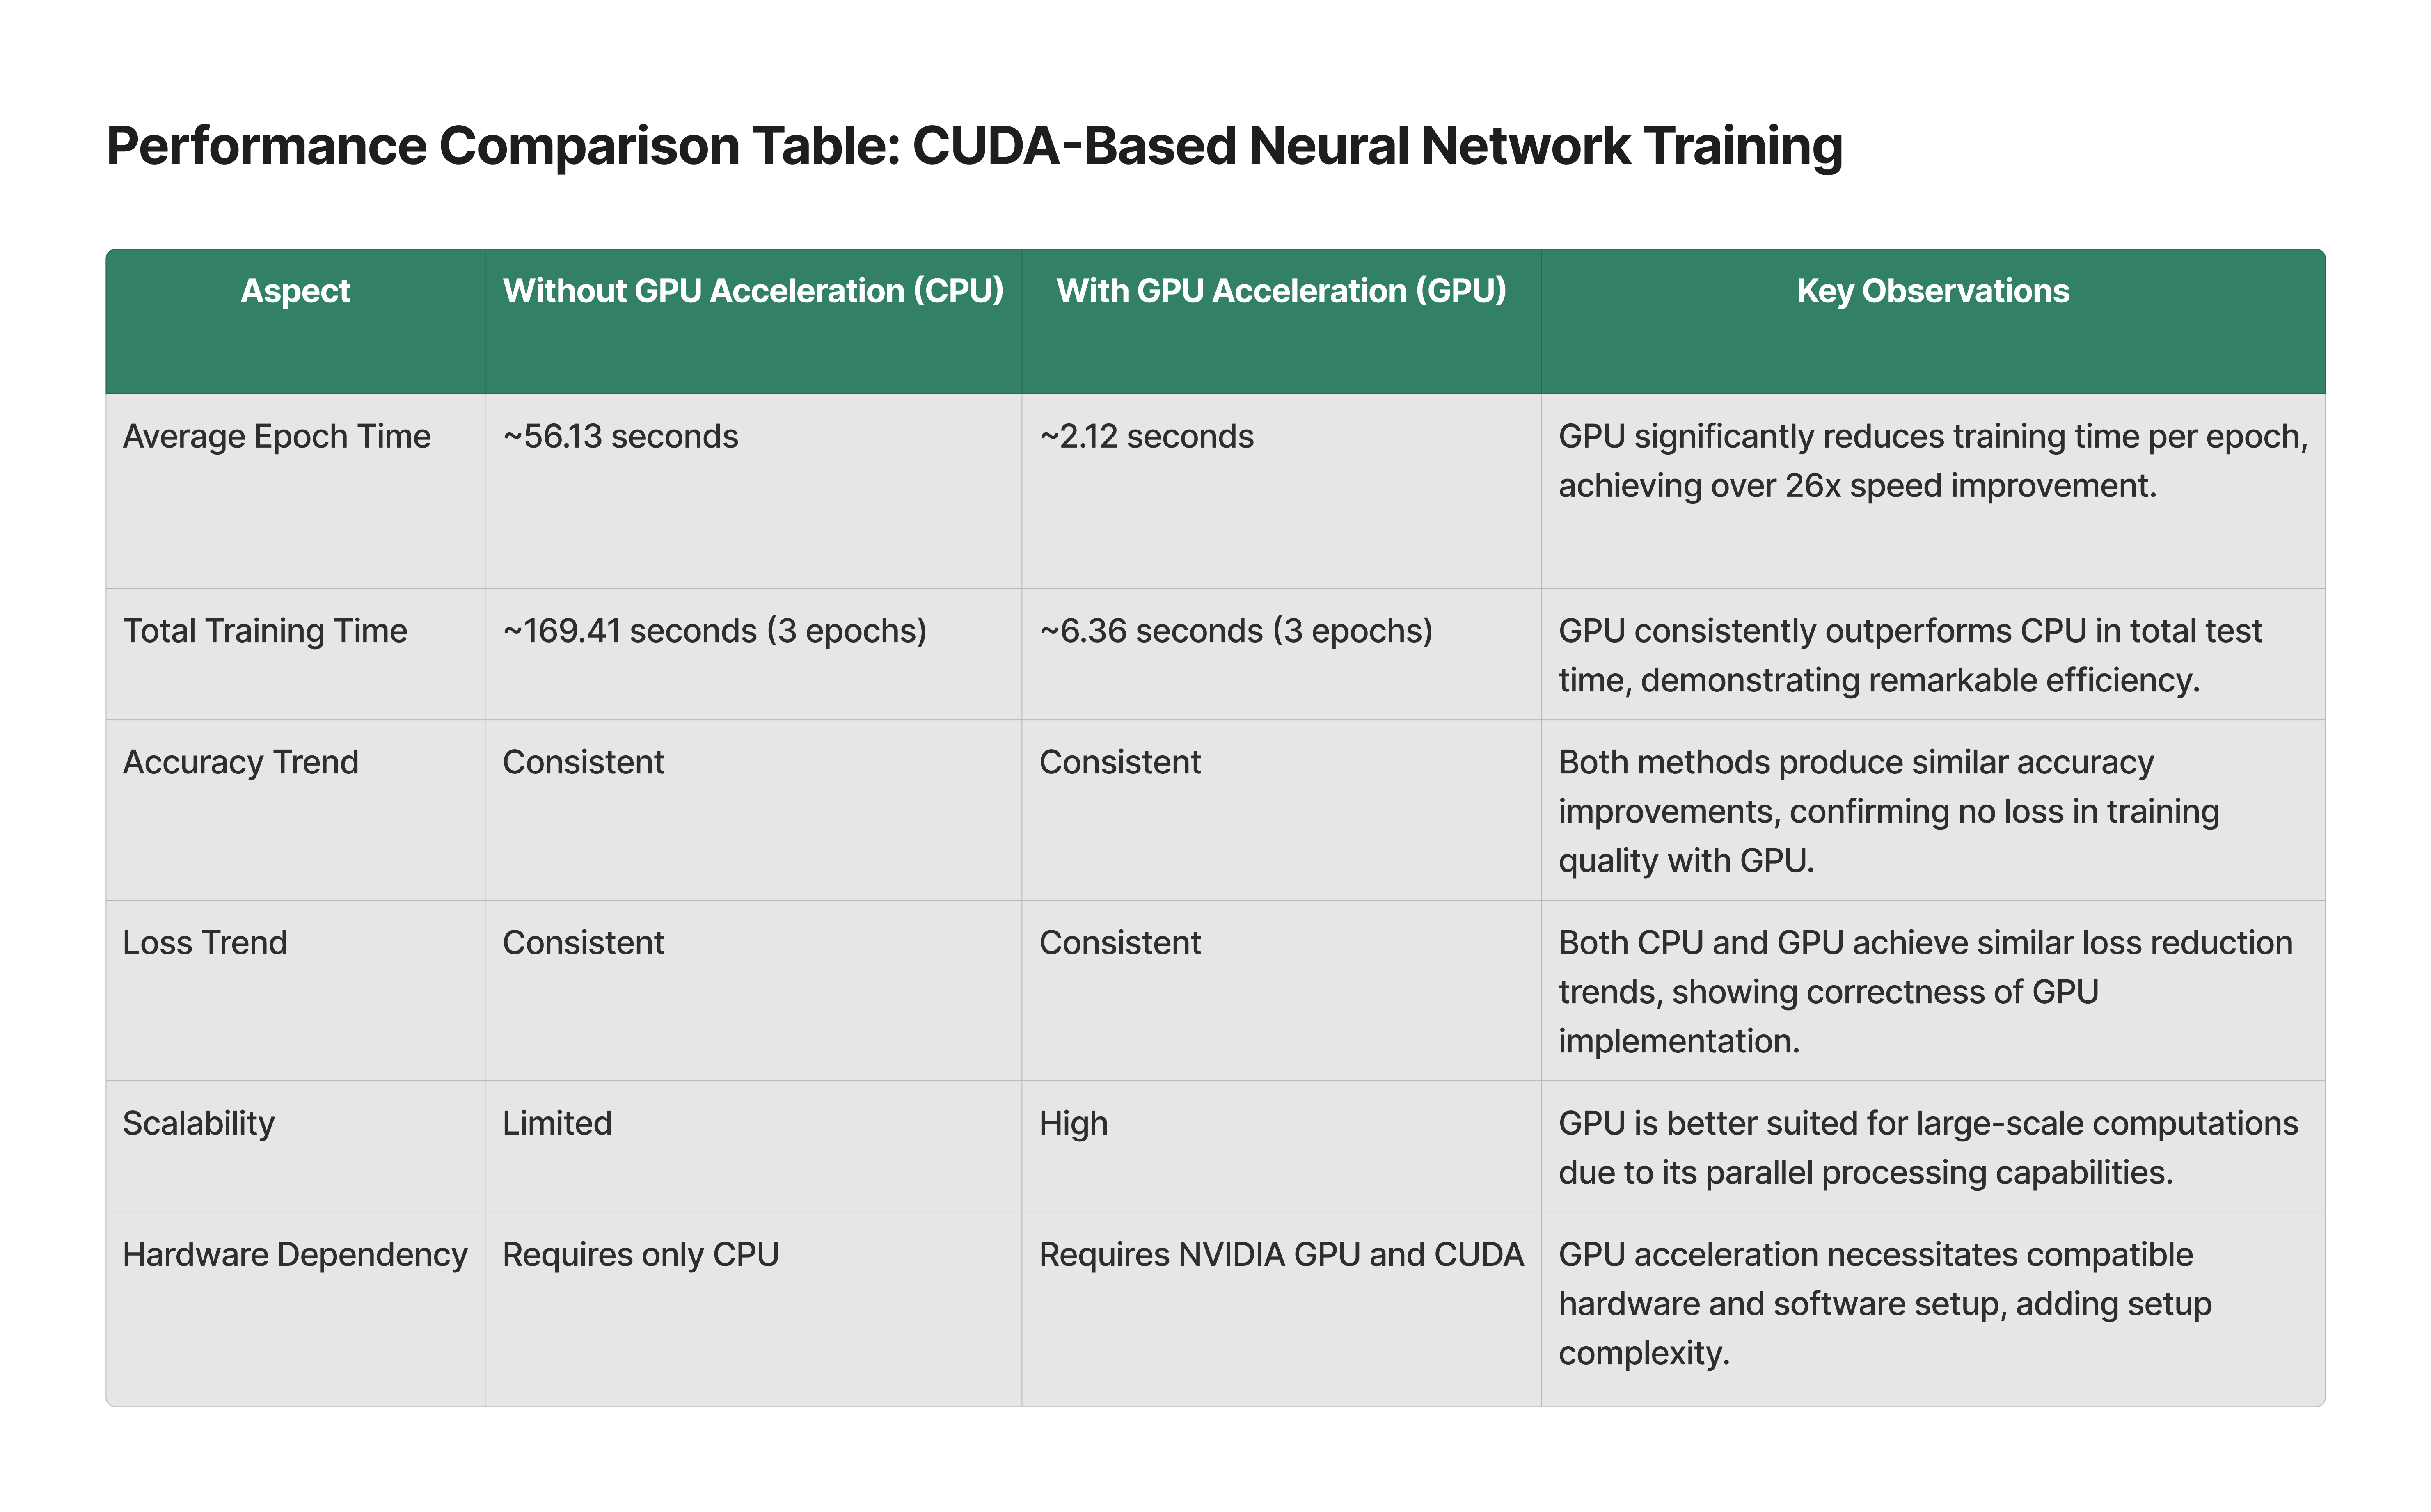

# VI. Discussion

### **1. Performance Improvements Achieved Through Optimizations**

The implementation achieved notable performance improvements through CUDA-based optimizations:  
- **Drastic Reduction in Training Time**: GPU acceleration reduced the average epoch training time by over **96%**, demonstrating the effectiveness of parallel computation for neural network training.  
- **Efficient Matrix Multiplications**: The use of optimized kernels (e.g., `matrixMultiKernel`) significantly accelerated key computational tasks, such as matrix multiplications and element-wise operations.  
- **Memory Management Enhancements**: By leveraging asynchronous CUDA operations, computation delays caused by memory transfers were minimized, ensuring smoother execution.  
- **Scalable Implementation**: The GPU implementation scales efficiently with larger datasets and complex models, making it suitable for real-world applications.  

### **2. Limitations of the Implementation**

While the optimizations provided substantial improvements, several limitations were identified:  
- **High Memory Transfer Overhead**: A significant portion of GPU time was consumed by memory transfers (`HtoD` and `DtoH`), limiting the performance gains achieved by the kernels.  
- **Suboptimal Kernel Utilization**: Profiling revealed underutilized kernels, particularly in smaller computations where GPU parallelism was not fully exploited.  
- **Lack of Advanced Optimization Techniques**: Advanced CUDA optimization techniques were not implemented, leaving potential performance gains untapped.  

### **3. Potential Areas for Further Improvement**

To further enhance the implementation, the following areas can be addressed:  
- **Optimize Memory Transfers**: Implementing techniques like memory pinning or overlapping computation with memory transfers using streams can significantly reduce transfer overhead.  
- **Enhance Kernel Efficiency**: Revisiting kernel designs to leverage shared memory and reduce redundant operations could improve computational efficiency.  
- **Implement Mixed-Precision Training**: Using mixed-precision computation can reduce memory usage and accelerate training without sacrificing accuracy.   
- **Dynamic Workload Balancing**: Adapting the workload dynamically based on the GPU utilization could prevent underutilization during smaller tasks.  
- **Advanced Profiling and Debugging**: Leveraging tools like Nsight Systems for deeper profiling insights could uncover additional inefficiencies and optimization opportunities.  
- **Model Fine-Tuning**: Experimenting with initialization techniques and hyperparameter tuning could address the accuracy gap between CPU and GPU implementations.  
- **Distributed Computing**: Extending the implementation to multi-GPU setups or distributed environments can handle larger datasets and models efficiently.

### **4. Self-reflection**
#### **Nguyen Hoang Anh Tuan - 21127471**

Through this project, I learn:
- How MLP work.
- How to represent MLP.
- Work more closely with 2D matrix as a 1D vector.

#### **Phan Huy Duc Tai - 21127687**
> From this project, I managed to learn multiple methods of improving the sequential implementation of traditional programming such as parallelization, using shared memory and streams. I also learned how the device kernel operates through the use of profilers and Nsight Systems, and it helps me debug as well as figure ways to improve the program.


#### **Ho Dinh Duy Luc - 21127351**

>This project has significantly improved my skills in writing clear and structured reports, creating detailed diagrams, and effectively communicating with team members.This experience enhanced my ability to articulate thoughts clearly, fostering better teamwork and collaboration throughout the project.

# **VII. Conclusion**

This project demonstrated the significant advantages of GPU acceleration in neural network training through CUDA implementation. By leveraging parallel computation capabilities, the training time was reduced by over **96%**, highlighting the efficiency of GPU-based optimization. The implementation successfully showcased how core operations like matrix multiplications and activation functions can be accelerated using custom CUDA kernels.  

Despite the impressive performance gains, the analysis identified key limitations, including high memory transfer overhead, suboptimal kernel utilization, and discrepancies in initial accuracy compared to CPU implementations. These findings underline the importance of optimizing memory management and kernel execution to fully realize the potential of GPU acceleration.  

The project serves as a foundational step toward efficient deep learning applications using CUDA. With further enhancements, such as shared memory optimization, mixed-precision training, and advanced profiling techniques, the implementation can achieve even greater efficiency, scalability, and accuracy.  

Overall, this work not only highlights the transformative impact of GPU acceleration in machine learning but also provides valuable insights into areas for improvement, paving the way for more robust and high-performance neural network training systems.

# VIII. Reference:
1. Desai, Y. (1970, January 1). Tiled matrix multiplication using shared memory in Cuda. TILED Matrix Multiplication Using Shared Memory in CUDA. https://www.cstechera.com/2016/03/tiled-matrix-multiplication-using-shared-memory-in-cuda.html

2. An efficient matrix transpose in CUDA C/C++. NVIDIA Technical Blog. (2022, August 21). https://developer.nvidia.com/blog/efficient-matrix-transpose-cuda-cc/

3. Fashion-MNIST: A novel image dataset for benchmarking ... (n.d.). https://arxiv.org/pdf/1708.07747

4. Vu, T. (2017, February 24). Bài 14: Multi-layer Perceptron VÀ backpropagation. Tiep Vu’s blog. https://machinelearningcoban.com/2017/02/24/mlp/

5. Zalandoresearch. (n.d.). Zalandoresearch/fashion-mnist: A mnist-like fashion product database. benchmark. GitHub. https://github.com/zalandoresearch/fashion-mnist
6. Phạm Trọng Nghĩa, CSC14120 - Parallel Programming( semester I, 2024-2025)'s materials,  FACULTY OF INFORMATION TECHNOLOGY - VNUHCM-UNIVERSITY OF SCIENCE.